<a href="https://colab.research.google.com/github/cam2149/MachinelearningI/blob/main/Examen3_Ejercicio4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Maestría en Inteligencia Artificial Aplicada

## Aprendizaje Automatico 1

## Examen 3

### Integrantes

- Andres Felipe Borrero
- Yesid Castelblanco
- Nicolas Colmenares
- Carlos Alberto Martinez

### **Profesores**

- Santiago Ortiz
- Henry Velasco

**Notas:**
-	Todas las respuestas, gráficas, tablas y operaciones deben ser debidamente justificadas.
-	La información que sea obtenida de alguna fuente debe ser citada y referenciada en el documento a entregar.


# Ejercicio 4

4)	El fichero de datos *“Dengue_Data.xlsx”* contiene información epidemiológica de los casos de Dengue en el Departamento de Antioquia. Estos datos contienen tanto información socio-económica como clínica de las personas que resultaron infectadas y desarrollaron Dengue o Dengue Hemorrágico. Para una completa descripción de los datos y/o fenómeno estudiado, remítase al siguiente artículo *Identification of Hazard and Socio-Demographic Patterns of Dengue Infections in a Colombian Subtropical Region from 2015 to 2020: Cox Regression Models and Statistical Analysis.

*Realizar.

* Utilizando solo las variables socio-demográficas, ajuste un modelo Logit y los modelos Logit-Ridge, Logit-LASSO y Logit-Enet (con sus parámetros óptimos, por supuesto) para predecir si una persona va a desarrollar “DENGUE” o “DENGUE GRAVE”. Interprete los resultados de cada modelo y compárelos; defina que variables son las más importantes par predecir el estado categórico modelado, muestre los gráficos de penalidad y de evolución de coeficientes. * Concluya sobre el fenómeno estudiado y a información del artículo.
* Realice el mismo ejercicio anterior, solo que ahora considere como variables explicativas las variables de tipo clínico/médico para modelar si una persona requiere o no ser hospitali- zada. Realice los mismos análisis y procedimientos. Concluya en función de la información presentada en el artículo.


In [625]:
# Tratamiento de datos
# ==============================================================================
# Pandas es una librería de Python que proporciona estructuras de datos y herramientas de análisis de datos de alto rendimiento
import pandas as pd
# NumPy es una librería de Python que proporciona estructuras de datos y operaciones matemáticas de alto rendimiento.
import numpy as np

# Gráficos
# ==============================================================================
#Matplotlib.pyplot es una librería de Python que proporciona herramientas de visualización y gráficos de alta calidad.
import matplotlib.pyplot as plt
from matplotlib import style
from IPython.display import Math, Latex
from IPython.core.display import Image
#Seaborn es una librería de Python que proporciona herramientas de visualización y análisis de datos de alta calidad.
import seaborn as sns

# Métricas
# ==============================================================================
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import precision_score, recall_score, auc,roc_curve, f1_score

from tqdm.auto import tqdm
import time

# Preprocesado y modelado
# ==============================================================================
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

# Configuración seaborn
# ==============================================================================
#sns.set(color_codes=True) es un método de la librería Seaborn que establece los códigos de color predeterminados para los gráficos y diagramas. Cuando se establece color_codes=True, Seaborn utiliza una paleta de colores predefinida y asigna un código de color a cada categoría o variable en los gráficos y diagramas.
sns.set(color_codes=True)
#Cuando se establece rc={'figure.figsize':(10,6)}, Seaborn crea figuras con un tamaño de 10 unidades de ancho y 6 unidades de alto.
sns.set(rc={'figure.figsize':(10,6)})

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

#Datos
Contiene información epidemiológica de los casos de Dengue en el Departamento de Antioquia. Estos datos contienen tanto información socio-económica como clínica de las personas que resultaron infectadas y desarrollaron Dengue o Dengue Hemorrágico

In [626]:
url = 'https://github.com/cam2149/MachinelearningI/raw/19a9b08e636dd80915a4727c674a04c64a962b59/Dengue_Data.xlsx'
dfDengue = pd.read_excel(url, sheet_name='datos_2')

In [627]:
dfDengue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50397 entries, 0 to 50396
Data columns (total 48 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   edad_                          50397 non-null  int64         
 1   Grupos edad                    50397 non-null  object        
 2   sexo_                          50397 non-null  object        
 3   area_                          50397 non-null  object        
 4   area_.1                        50397 non-null  object        
 5   area_.2                        50397 non-null  object        
 6   ocupacion_                     50397 non-null  object        
 7   per_etn_                       50397 non-null  object        
 8   gp_discapa                     49661 non-null  object        
 9   gp_desplaz                     49676 non-null  object        
 10  gp_migrant                     49696 non-null  object        
 11  gp_carcela     

In [628]:
##Ajuste de los valores de los encabezados
newHeaders = 'Edad', 'GrupoEdad', 'Genero', 'Area', 'Area1', 'Area2','Ocupacion', 'Etnia', 'Discapacidad', 'Desplazados', 'Inmigrantes',      'Prisionero', 'Embarazada', 'Indigena', 'Pobreza', 'Gestante','Desmovilizado', 'VictimaViolencia', 'Otros', 'FechaConsulta', 'InicioSintomas','TipoConsulta', 'Hospitalizado', 'FechaHospitalizacion','TiempodeDeterioro', 'Fiebre', 'DolorCabeza', 'DolorRetroOrbitario',               'DolorMuscular', 'DolorArticular', 'ErupcionCutanea', 'DolorAbdominal', 'Vomitos', 'Diarrea','Somnolencia', 'Hipotension', 'Hepatomegalia', 'HemMucosa', 'Hipotermia','CaidaPlaquetas', 'AcumulacionLiquido', 'AumentoHematocritos', 'Extravasacion', 'Hemorroides','Choque', 'DanioOrgano', 'Evento', 'Region'

dfDengue.columns = newHeaders


#Análisis exploratorio de los datos.


In [629]:
dfDengue.describe()

,Edad,FechaConsulta,InicioSintomas,TipoConsulta,FechaHospitalizacion,TiempodeDeterioro
count,50397.000000,50386,50384,50384.000000,14960,14959.000000
mean,29.609858,2017-01-25 06:06:35.252649728,2017-01-20 20:32:11.470307840,4.410349,2017-03-31 07:13:03.529411584,5.136841
min,1.000000,2015-01-04 00:00:00,2014-12-30 00:00:00,0.000000,2015-01-04 00:00:00,0.000000
25%,14.000000,2016-04-05 00:00:00,2016-04-01 00:00:00,2.000000,2016-03-23 00:00:00,3.000000
50%,26.000000,2016-08-01 00:00:00,2016-07-27 00:00:00,4.000000,2016-08-09 00:00:00,4.000000
75%,42.000000,2017-07-19 00:00:00,2017-07-15 00:00:00,5.000000,2018-08-06 00:00:00,6.000000
max,131.000000,2021-02-09 00:00:00,2021-01-02 00:00:00,374.000000,2021-01-11 00:00:00,373.000000
std,19.029978,NaN,NaN,9.448480,NaN,11.527729


In [630]:
dfDengue.head(3)

,Edad,GrupoEdad,Genero,Area,Area1,Area2,Ocupacion,Etnia,Discapacidad,Desplazados,...,Hipotermia,CaidaPlaquetas,AcumulacionLiquido,AumentoHematocritos,Extravasacion,Hemorroides,Choque,DanioOrgano,Evento,Region
0,4,Primera infancia,M,Rural Disperso,Rural Disperso,Rural Disperso,Ocupaciones elementales,"Negro, Mulato, Afrocolombiano",No,No,...,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,DENGUE,URABA
1,27,Adultez,M,Cabecera Municipal,Cabecera Municipal,Cabecera Municipal,Ocupaciones elementales,Otro,No,No,...,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,DENGUE,VALLE DE ABURRA
2,46,Adultez,F,Cabecera Municipal,Cabecera Municipal,Cabecera Municipal,Trabajadores de los servicios y vendedores de ...,Otro,No,No,...,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,DENGUE,VALLE DE ABURRA


In [631]:
dfDengue.tail()

,Edad,GrupoEdad,Genero,Area,Area1,Area2,Ocupacion,Etnia,Discapacidad,Desplazados,...,Hipotermia,CaidaPlaquetas,AcumulacionLiquido,AumentoHematocritos,Extravasacion,Hemorroides,Choque,DanioOrgano,Evento,Region
50392,6,Infancia,F,1,Cabecera Municipal,Cabecera Municipal,Ocupaciones elementales,Otro,No,No,...,No,Sí,Sí,No,Sí,No,No,No,DENGUE GRAVE,VALLE DE ABURRA
50393,9,Infancia,F,3,Rural Disperso,Rural Disperso,Ocupaciones elementales,"Negro, Mulato, Afrocolombiano",No,No,...,No,Sí,No,No,Sí,No,No,No,DENGUE GRAVE,URABA
50394,17,Adolescencia,F,3,Rural Disperso,Rural Disperso,Ocupaciones elementales,Otro,No,No,...,No,Sí,No,Sí,No,Sí,No,No,DENGUE GRAVE,URABA
50395,24,Juventud,F,1,Cabecera Municipal,Cabecera Municipal,Ocupaciones elementales,Otro,No,No,...,No,Sí,Sí,No,Sí,No,Sí,Sí,DENGUE GRAVE,BAJO CAUCA
50396,43,Adultez,F,1,Cabecera Municipal,Cabecera Municipal,Ocupaciones elementales,Otro,No,No,...,No,No,No,No,No,No,No,Sí,DENGUE GRAVE,NORDESTE


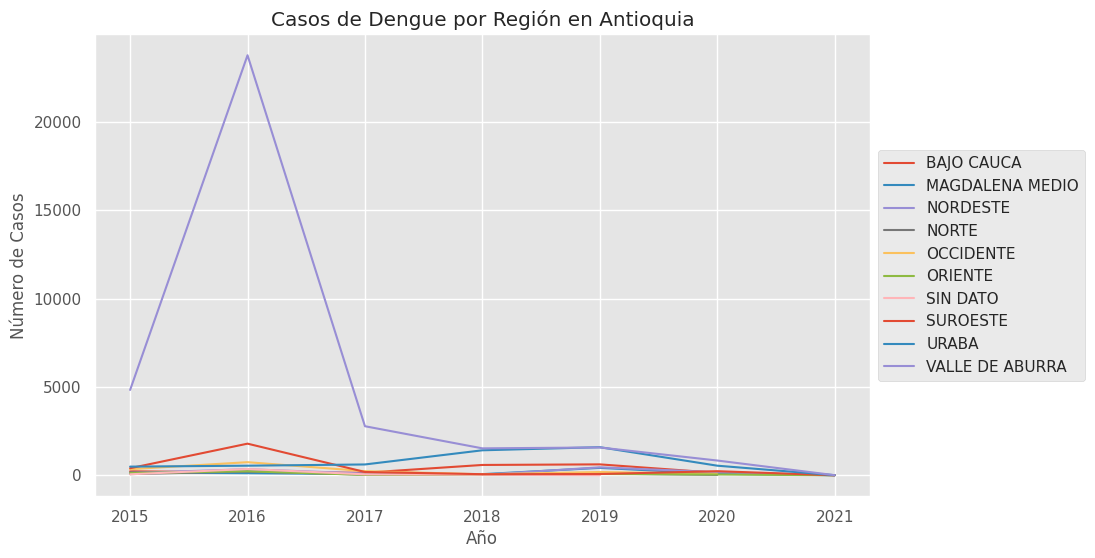

In [632]:
# Grafico de los casos registrados por region en todos los años por region
casos_por_region_y_año = dfDengue.groupby(['Region', dfDengue['FechaConsulta'].dt.year])['Region'].count().unstack()

# Crear una figura y ejes
fig, ax = plt.subplots(figsize=(10, 6))

# Iterar sobre las regiones y crear un gráfico de líneas para cada una
for region in casos_por_region_y_año.index:
  ax.plot(casos_por_region_y_año.columns, casos_por_region_y_año.loc[region], label=region)

# Ajustar la leyenda para que las regiones
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)

# Configurar el título y las etiquetas de los ejes
ax.set_title('Casos de Dengue por Región en Antioquia')
ax.set_xlabel('Año')
ax.set_ylabel('Número de Casos')

# Mostrar el gráfico
plt.show()

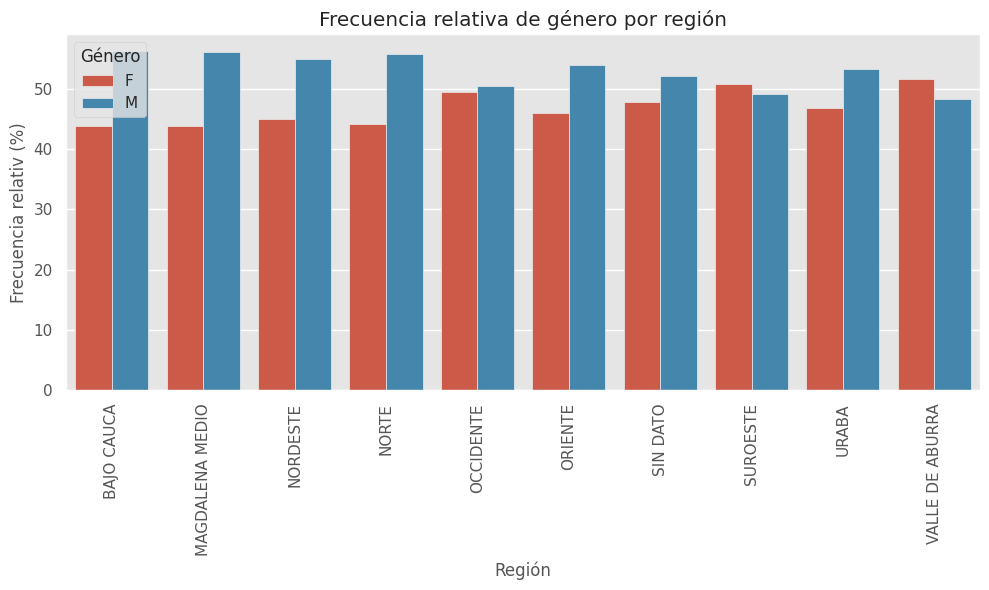

In [633]:
# Grafico de la frecencia relatica de los casos de denge registrados agrupados por Región y genero
genero_freq_by_region = dfDengue.groupby(['Region', 'Genero'])['Genero'].count() / dfDengue.groupby('Region')['Genero'].count() * 100
genero_freq_by_region = genero_freq_by_region.reset_index(name='Relative Frequency')
# Crear una figura y ejes
sns.barplot(x='Region', y='Relative Frequency', hue='Genero', data=genero_freq_by_region)
# Ajustar la leyenda para que las regiones
plt.title('Frecuencia relativa de género por región')
plt.xlabel('Región')
plt.ylabel('Frecuencia relativ (%)')
plt.xticks(rotation=90)
plt.legend(title='Género')
plt.tight_layout()
# Mostrar el gráfico
plt.show()

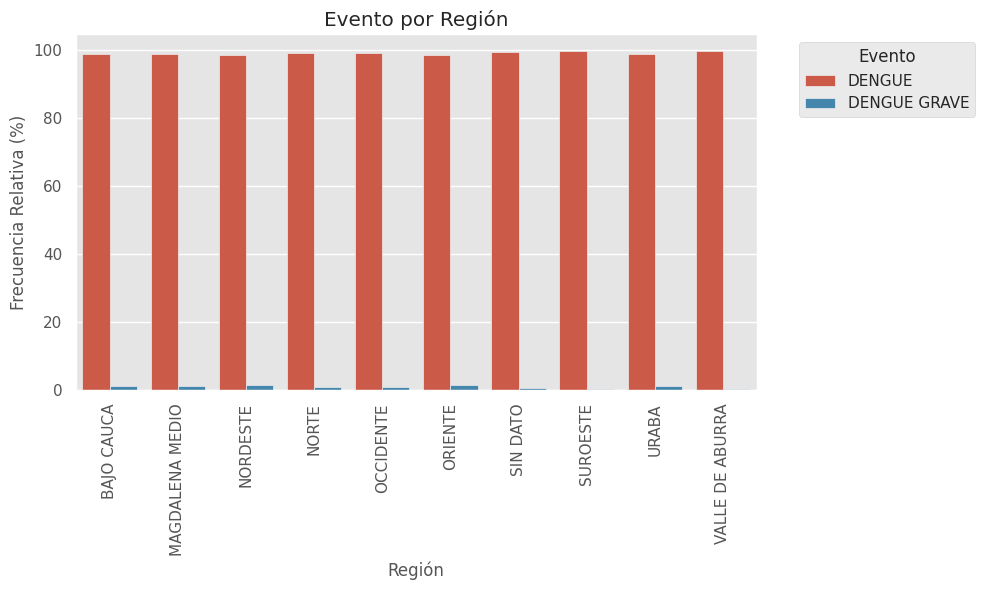

In [634]:
# Grafico de la frecencia relativa de los casos de Denge registrados agrupados por Región
nombre_evento_freq_by_region = dfDengue.groupby(['Region', 'Evento'])['Evento'].count() / dfDengue.groupby('Region')['Evento'].count() * 100
nombre_evento_freq_by_region = nombre_evento_freq_by_region.reset_index(name='Relative Frequency')
# Crear una figura y ejes
sns.barplot(x='Region', y='Relative Frequency', hue='Evento', data=nombre_evento_freq_by_region)
# Ajustar la leyenda para que las regiones
plt.title('Evento por Región')
plt.xlabel('Región')
plt.ylabel('Frecuencia Relativa (%)')
plt.xticks(rotation=90)
plt.legend(title='Evento', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
# Mostrar el gráfico
plt.show()

#Limpieza de Datos

In [635]:
dfDengue.isna().sum()

,0
Edad,0
GrupoEdad,0
Genero,0
Area,0
Area1,0
Area2,0
Ocupacion,0
Etnia,0
Discapacidad,736
Desplazados,721


En el  conjunto de datos se indetifican una gran cantidad de datos nulos Discapacidad	736, Desplazados	721, Inmigrantes	701, Prisionero	716, Embarazada	25556, Indigena	706, Pobreza	709, Gestante	25582, Desmovilizado	702, VictimaViolencia	696, Otros	20, FechaConsulta	11, InicioSintomas	13, TipoConsulta	13, FechaHospitalizacion	35437, TiempodeDeterioro	35438, Fiebre	9, DolorCabeza	9, DolorRetroOrbitario	9, DolorMuscular	9, DolorArticular	9, ErupcionCutanea	9, DolorAbdominal	13, Vomitos	13, Diarrea	13, Somnolencia	754, Hipotension	13, Hepatomegalia	13, HemMucosa	752, Hipotermia	751, CaidaPlaquetas	749, AcumulacionLiquido	750, AumentoHematocritos	752, Extravasacion	50108, Hemorroides	50108, Choque	49294, DanioOrgano	50108
* Eliminar filas que todos sus datos son nulos
* Se realizara el replace correspondiente por valor 0, a las se identifican como respuesta [Si o No] o [Sí o No]
* La columna Evento se hará el reemplazo {"DENGUE": 1, "DENGUE GRAVE": 2}  
* La Columna Genero se hará el reemplazo {"M": 1, "F": 0}

In [636]:
# Eliminar filas con datos nulos
countCollumns = len(dfDengue)
dfDengue.dropna(how='all', inplace=True)

# Describir el efecto de la eliminación
print("Número de filas antes de eliminar datos nulos:", countCollumns)
print("Número de filas después de eliminar datos nulos:", len(dfDengue))
print("Número de filas eliminadas:", len(dfDengue) - countCollumns)

Número de filas antes de eliminar datos nulos: 50397
Número de filas después de eliminar datos nulos: 50397
Número de filas eliminadas: 0


In [637]:
# Eliminar columnas con una cantidad significativa de valores nulos, más del 50%
threshold = 0.5  # Umbral para la proporción de valores nulos
countCollumns = len(dfDengue.columns) # Cantidad de columnas del dataset
dfDengue.dropna(thresh=len(dfDengue) * threshold, axis=1, inplace=True)

# Imprimir la cantidad de columnas eliminadas
print(f"Se eliminaron {len(dfDengue.columns) - countCollumns} columnas con más del {threshold * 100}% de valores nulos.")

# Mostrar las columnas restantes
print("Columnas restantes:", dfDengue.columns.tolist())

Se eliminaron -8 columnas con más del 50.0% de valores nulos.
Columnas restantes: ['Edad', 'GrupoEdad', 'Genero', 'Area', 'Area1', 'Area2', 'Ocupacion', 'Etnia', 'Discapacidad', 'Desplazados', 'Inmigrantes', 'Prisionero', 'Indigena', 'Pobreza', 'Desmovilizado', 'VictimaViolencia', 'Otros', 'FechaConsulta', 'InicioSintomas', 'TipoConsulta', 'Hospitalizado', 'Fiebre', 'DolorCabeza', 'DolorRetroOrbitario', 'DolorMuscular', 'DolorArticular', 'ErupcionCutanea', 'DolorAbdominal', 'Vomitos', 'Diarrea', 'Somnolencia', 'Hipotension', 'Hepatomegalia', 'HemMucosa', 'Hipotermia', 'CaidaPlaquetas', 'AcumulacionLiquido', 'AumentoHematocritos', 'Evento', 'Region']


In [638]:
# Eliminar columnas de fechas no significativas para la prediccion de la variable objetivo Evento
columns_to_drop = ['FechaConsulta', 'InicioSintomas']
dfDengue.drop(columns = columns_to_drop, inplace=True)
# Mostrar las columnas restantes
print("Columnas restantes:", dfDengue.columns.tolist())

Columnas restantes: ['Edad', 'GrupoEdad', 'Genero', 'Area', 'Area1', 'Area2', 'Ocupacion', 'Etnia', 'Discapacidad', 'Desplazados', 'Inmigrantes', 'Prisionero', 'Indigena', 'Pobreza', 'Desmovilizado', 'VictimaViolencia', 'Otros', 'TipoConsulta', 'Hospitalizado', 'Fiebre', 'DolorCabeza', 'DolorRetroOrbitario', 'DolorMuscular', 'DolorArticular', 'ErupcionCutanea', 'DolorAbdominal', 'Vomitos', 'Diarrea', 'Somnolencia', 'Hipotension', 'Hepatomegalia', 'HemMucosa', 'Hipotermia', 'CaidaPlaquetas', 'AcumulacionLiquido', 'AumentoHematocritos', 'Evento', 'Region']


In [639]:
# Recorrer todos los campos y si su valor es NaN convertir en un 0, si el en valor es No en 0 o si el valor es Si en 1
excluded_columns = ['Evento', 'Genero']
for column in dfDengue.columns:
  if column not in excluded_columns:
    # Reemplazar valoes NaN con 0
    dfDengue[column].fillna(0, inplace=True)
    # Reemplazar "No" con 0 y "Si" con 1
    dfDengue[column] = dfDengue[column].replace({"No": 0, "Si": 1, "Sí" : 1})

# Reemplazar "DENGUE" con 1 and "DENGUE GRAVE" con 2
dfDengue['Evento'] = dfDengue['Evento'].replace({"DENGUE": 0, "DENGUE GRAVE": 1})
dfDengue['Genero'] = dfDengue['Genero'].replace({'M': 1, 'F': 0})


In [640]:
for column in dfDengue.columns:
  if pd.api.types.is_numeric_dtype(dfDengue[column]):
    # Convertir la columna a tipo int si es posible
    try:
      dfDengue[column] = dfDengue[column].astype(int)
    except ValueError:
      # Si no se puede convertir a int, mantener el tipo original
      pass

In [641]:
print(dfDengue.isna().sum())

Edad                   0
GrupoEdad              0
Genero                 0
Area                   0
Area1                  0
Area2                  0
Ocupacion              0
Etnia                  0
Discapacidad           0
Desplazados            0
Inmigrantes            0
Prisionero             0
Indigena               0
Pobreza                0
Desmovilizado          0
VictimaViolencia       0
Otros                  0
TipoConsulta           0
Hospitalizado          0
Fiebre                 0
DolorCabeza            0
DolorRetroOrbitario    0
DolorMuscular          0
DolorArticular         0
ErupcionCutanea        0
DolorAbdominal         0
Vomitos                0
Diarrea                0
Somnolencia            0
Hipotension            0
Hepatomegalia          0
HemMucosa              0
Hipotermia             0
CaidaPlaquetas         0
AcumulacionLiquido     0
AumentoHematocritos    0
Evento                 0
Region                 0
dtype: int64


In [642]:
dfDengue.describe()

,Edad,Genero,Discapacidad,Desplazados,Inmigrantes,Prisionero,Indigena,Pobreza,Desmovilizado,VictimaViolencia,...,Diarrea,Somnolencia,Hipotension,Hepatomegalia,HemMucosa,Hipotermia,CaidaPlaquetas,AcumulacionLiquido,AumentoHematocritos,Evento
count,50397.000000,50397.000000,50397.000000,50397.000000,50397.000000,50397.000000,50397.000000,50397.000000,50397.000000,50397.000000,...,50397.000000,50397.000000,50397.000000,50397.000000,50397.000000,50397.000000,50397.000000,50397.000000,50397.000000,50397.000000
mean,29.609858,0.497212,0.002143,0.005437,0.003631,0.000992,0.001151,0.000794,0.000694,0.001667,...,0.150882,0.033018,0.016330,0.012282,0.037264,0.004603,0.218108,0.013354,0.032542,0.005873
std,19.029978,0.499997,0.046243,0.073535,0.060150,0.031483,0.033905,0.028162,0.026344,0.040792,...,0.357937,0.178685,0.126744,0.110145,0.189410,0.067693,0.412965,0.114786,0.177435,0.076413
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,131.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [643]:
unique_nombre_evento_counts = dfDengue['Evento'].value_counts()
print(unique_nombre_evento_counts)

Evento
0    50101
1      296
Name: count, dtype: int64


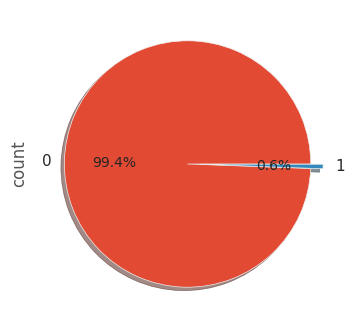

In [644]:
plt.figure(figsize=[4,4])
dfDengue['Evento'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',shadow=True)
plt.show()

In [645]:
# Se seleccionan las columnas a estandarizar
columns_to_standardize = ['GrupoEdad', 'Area', 'Area1', 'Area2', 'Ocupacion', 'Etnia', 'Region']
#scaler = StandardScaler()

# Convertir valores de cadena en representaciones numéricas usando codificación de etiquetas
# Esto es necesario antes de escalar porque StandardScaler trabaja con datos numéricos.
for column in columns_to_standardize:
  if dfDengue[column].dtype == 'object':
    unique_values = dfDengue[column].unique()
    value_mapping = {value: index for index, value in enumerate(unique_values)}

    # Reemplazar valores de cadena con etiquetas numéricas
    dfDengue[column] = dfDengue[column].map(value_mapping)

# Se ajusta y transforma las columnas seleccionadas.
#dfDengue[columns_to_standardize] = scaler.fit_transform(dfDengue[columns_to_standardize])

# Calculo de la matriz de correlación.
#correlation_matrix = dfDengue.corr()
#(correlation_matrix)

#Modelos *Socio*-demográficas

###Filtrando las variables socio-demográficas

Para poder evaluar la capacidad predictiva de cada modelo, se dividen las observaciones disponibles en dos grupos: uno de entrenamiento (70%) y otro de test (30%).

In [646]:
dfDengue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50397 entries, 0 to 50396
Data columns (total 38 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Edad                 50397 non-null  int64
 1   GrupoEdad            50397 non-null  int64
 2   Genero               50397 non-null  int64
 3   Area                 50397 non-null  int64
 4   Area1                50397 non-null  int64
 5   Area2                50397 non-null  int64
 6   Ocupacion            50397 non-null  int64
 7   Etnia                50397 non-null  int64
 8   Discapacidad         50397 non-null  int64
 9   Desplazados          50397 non-null  int64
 10  Inmigrantes          50397 non-null  int64
 11  Prisionero           50397 non-null  int64
 12  Indigena             50397 non-null  int64
 13  Pobreza              50397 non-null  int64
 14  Desmovilizado        50397 non-null  int64
 15  VictimaViolencia     50397 non-null  int64
 16  Otros                5

In [647]:
print("Columnas", dfDengue.columns.tolist())

Columnas ['Edad', 'GrupoEdad', 'Genero', 'Area', 'Area1', 'Area2', 'Ocupacion', 'Etnia', 'Discapacidad', 'Desplazados', 'Inmigrantes', 'Prisionero', 'Indigena', 'Pobreza', 'Desmovilizado', 'VictimaViolencia', 'Otros', 'TipoConsulta', 'Hospitalizado', 'Fiebre', 'DolorCabeza', 'DolorRetroOrbitario', 'DolorMuscular', 'DolorArticular', 'ErupcionCutanea', 'DolorAbdominal', 'Vomitos', 'Diarrea', 'Somnolencia', 'Hipotension', 'Hepatomegalia', 'HemMucosa', 'Hipotermia', 'CaidaPlaquetas', 'AcumulacionLiquido', 'AumentoHematocritos', 'Evento', 'Region']


<Axes: >

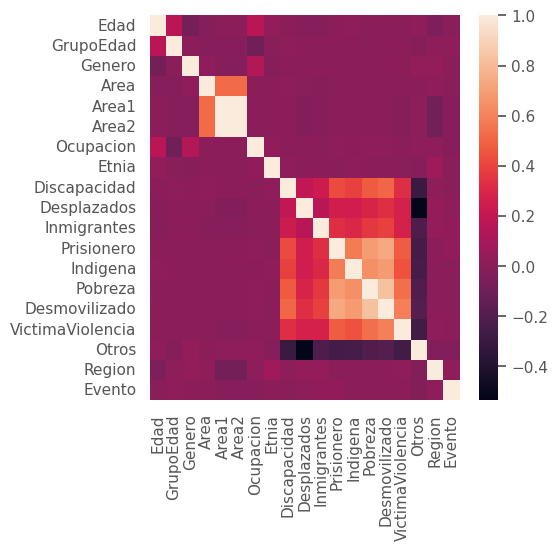

In [648]:
socio_demo_vars = ['Edad', 'GrupoEdad', 'Genero', 'Area', 'Area1', 'Area2',
                  'Ocupacion', 'Etnia', 'Discapacidad', 'Desplazados',
                  'Inmigrantes', 'Prisionero', 'Indigena', 'Pobreza',
                  'Desmovilizado', 'VictimaViolencia', 'Otros', 'Region',
                  'Evento']

df_socio_demo = dfDengue[socio_demo_vars]

correlation_matrix = df_socio_demo.corr()

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (5, 5))
sns.heatmap(correlation_matrix, ax = ax)

In [649]:

dfDengueSocioDemo = dfDengue[socio_demo_vars].copy()

# Definir variables predictoras (X) y variable objetivo (y)
X = dfDengueSocioDemo.drop('Evento', axis=1)
y = (dfDengueSocioDemo['Evento']).astype(int)
y = y.values.ravel()

# Escalar las variables predictoras
#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)


In [650]:
from sklearn.preprocessing import MinMaxScaler

# Dividir los datos en conjuntos de entrenamiento y prueba (opcional, para evaluar el modelo)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#scaler = MinMaxScaler()  # Instancia de la clase MinMaxScaler
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)


In [651]:
# Porcentaje de los valores unicos de , y_train
unique_y_train_counts = pd.Series(y_train).value_counts(normalize=True) * 100
unique_y_train_counts

,proportion
0,99.410381
1,0.589619


##Modelo LogisticRegression sin regularización






In [652]:
#LogisticRegression
logitreg_model = LogisticRegression(penalty=None)
logitreg_model.fit(X_train, y_train)
logitreg_y_pred = logitreg_model.predict(X_test)

In [653]:
print("Usaremos estas métricas como comparación de referencia para cualquier mejora que obtengamos con la regularizacion Logit-Ridge, Logit-LASSO y Logit-Enet")
print("=========================================================.")
logitreg_model_precision_score = precision_score(y_test, logitreg_y_pred, average='macro')
print("Precisión del Modelo LogisticRegression con el set de Pruebas: {:.4f}".format(logitreg_model_precision_score))
logitreg_model_recall_score = recall_score(y_test, logitreg_y_pred, average='macro')
print('Recall del Modelo LogisticRegression con el set de Pruebas: {:.4f}'.format(logitreg_model_recall_score))
logitreg_model_f1_score = f1_score(y_test, logitreg_y_pred, average='macro')
print('F1 Score del Modelo LogisticRegression con el set de Pruebas: {:.4f}'.format(logitreg_model_f1_score))
print("=========================================================.")
scores = cross_val_score(logitreg_model,X_train,y_train,cv=5,scoring='roc_auc',n_jobs=-1)
logitreg_model_roc_auc = scores.mean()
print("AUC Cross Val Score del set de entrenamiento: {:.4f}".format(logitreg_model_roc_auc))
acc = cross_val_score(logitreg_model,X_train,y_train,cv=5,scoring='accuracy',n_jobs=-1)
logitreg_model_accv = acc.mean()
print("Accuracy Cross Val Score del Modelo LogisticRegression para el set de entrenamiento: {:.4f}".format(logitreg_model_accv))
logitreg_model_score_train = logitreg_model.score(X_train, y_train)
print("Accuracy del Modelo LogisticRegression del set de entrenamiento set: {:.4f}".format(logitreg_model_score_train))
logitreg_model_score_test = logitreg_model.score(X_test, y_test)
print("Accuracy del Modelo LogisticRegression del set de pruebas: {:.4f}".format(logitreg_model_score_test))
# Error de test del modelo
# ==============================================================================
logitreg_model_rmse_ols = mean_squared_error(y_test, logitreg_y_pred, squared = False )
print("El error (rmse) de test es: {:.4f}".format(logitreg_model_rmse_ols))

Usaremos estas métricas como comparación de referencia para cualquier mejora que obtengamos con la regularizacion Logit-Ridge, Logit-LASSO y Logit-Enet
=========================================================.
Precisión del Modelo LogisticRegression con el set de Pruebas: 0.4971
Recall del Modelo LogisticRegression con el set de Pruebas: 0.5000
F1 Score del Modelo LogisticRegression con el set de Pruebas: 0.4985
=========================================================.
AUC Cross Val Score del set de entrenamiento: 0.5569
Accuracy Cross Val Score del Modelo LogisticRegression para el set de entrenamiento: 0.9941
Accuracy del Modelo LogisticRegression del set de entrenamiento set: 0.9941
Accuracy del Modelo LogisticRegression del set de pruebas: 0.9942
El error (rmse) de test es: 0.0763


In [654]:
residuals_logitreg_model = y_test - logitreg_y_pred
print("Media de los resideales:", np.mean(residuals_logitreg_model))
print("Desviación estándar de los residuales:", np.std(residuals_logitreg_model))


Media de los resideales: 0.00582010582010582
Desviación estándar de los residuales: 0.07606728724194514


Las predicciones del modelo final se alejan en promedio 0.07606
unidades del valor real.



Coeficientes: [[-1.54510525e-03  6.54530628e-02 -4.09205583e-02  2.20197015e-01
  -2.35360049e-01 -2.35360049e-01 -7.60621429e-02  2.54159682e-01
  -4.43823838e-01 -7.74711066e-01  1.11342924e-01  1.05945993e-03
  -2.39990210e-01 -1.75328665e-01 -1.41207491e-01  6.37135302e-02
  -2.04477180e+00  4.43297000e-02]]
Intercepto: [-3.29017292]
Coeficiente: [('Edad', -0.0015451052468487803), ('GrupoEdad', 0.0654530627822511), ('Genero', -0.04092055828169914), ('Area', 0.22019701489119795), ('Area1', -0.235360048768328), ('Area2', -0.235360048768328), ('Ocupacion', -0.07606214290418802), ('Etnia', 0.25415968153293556), ('Discapacidad', -0.4438238376477244), ('Desplazados', -0.7747110656182455), ('Inmigrantes', 0.11134292404479129), ('Prisionero', 0.0010594599269353076), ('Indigena', -0.23999020955650044), ('Pobreza', -0.1753286648850158), ('Desmovilizado', -0.14120749109131336), ('VictimaViolencia', 0.06371353022397562), ('Otros', -2.044771799225836), ('Region', 0.04432969998261621)]



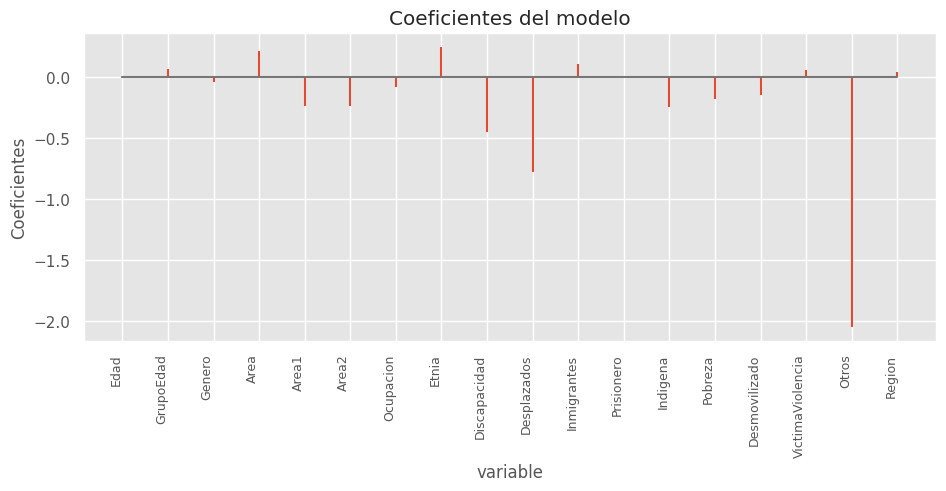

In [655]:
# Coeficientes del modelo
# ==============================================================================
coefficients = logitreg_model.coef_
intercept = logitreg_model.intercept_
print("")
print("Coeficientes:", coefficients)
print("Intercepto:", intercept)
print("Coeficiente:", list(zip(X.columns, logitreg_model.coef_.flatten(), )))
print("")
dfDenge_coeficientes = pd.DataFrame({'predictor': X.columns, 'coef': logitreg_model.coef_[0]})

fig, ax = plt.subplots(figsize=(11, 4))
ax.stem(dfDenge_coeficientes.predictor, dfDenge_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=9)
ax.set_xlabel('variable')
ax.set_ylabel('Coeficientes')
ax.set_title('Coeficientes del modelo');

##Modelo LogisticRegression con regularización Logit-Lasso





In [656]:
lasso_model = LogisticRegression(random_state=42,
                                 C = 0.1, ### parametro de penalización, valores menores a uno penalizacion alta
                                 class_weight= 'balanced',
                                 penalty= 'l1', ## Elgir como penalizar: l1, l2, elasticnet, None
                                 solver= 'liblinear' ### Algoritmo de optimización
                                 )
lasso_model.fit(X_train, y_train) #This line is added to train the model
y_pred_lasso_model = lasso_model.predict(X_test)

In [657]:
print("=========================================================.")
lasso_model_precision_score = precision_score(y_test, y_pred_lasso_model, average='macro')
print("Precisión del Modelo LogisticRegression con LASSO el set de Pruebas: {:.4f}".format(lasso_model_precision_score))
lasso_model_recall_score = recall_score(y_test, y_pred_lasso_model, average='macro')
print('Recall del Modelo LogisticRegression con con LASSO el set de Pruebas: {:.4f}'.format(lasso_model_recall_score))
lasso_model_f1_score = f1_score(y_test, y_pred_lasso_model, average='macro')
print('F1 Score del Modelo LogisticRegression con LASSO con el set de Pruebas: {:.4f}'.format(lasso_model_f1_score))
print("=========================================================.")
scores = cross_val_score(lasso_model,X_train,y_train,cv=5,scoring='roc_auc',n_jobs=-1)
lasso_model_roc_auc = scores.mean()
print("AUC Cross Val Score del set de entrenamiento: {:.4f}".format(lasso_model_roc_auc))
acc = cross_val_score(lasso_model,X_train,y_train,cv=5,scoring='accuracy',n_jobs=-1)
lasso_model_accv = acc.mean()
print("Accuracy Cross Val Score del Modelo LogisticRegression con LASSO para el set de entrenamiento: {:.4f}".format(lasso_model_accv))
lasso_model_score_train = lasso_model.score(X_train, y_train)
print("Accuracy del Modelo LogisticRegression con LASSO del set de entrenamiento set: {:.4f}".format(lasso_model_score_train))
lasso_model_score_test = lasso_model.score(X_test, y_test)
print("Accuracy del Modelo LogisticRegression con LASSO del set de pruebas: {:.4f}".format(lasso_model_score_test))

=========================================================.
Precisión del Modelo LogisticRegression con LASSO el set de Pruebas: 0.5026
Recall del Modelo LogisticRegression con con LASSO el set de Pruebas: 0.6022
F1 Score del Modelo LogisticRegression con LASSO con el set de Pruebas: 0.3972
=========================================================.
AUC Cross Val Score del set de entrenamiento: 0.5622
Accuracy Cross Val Score del Modelo LogisticRegression con LASSO para el set de entrenamiento: 0.6471
Accuracy del Modelo LogisticRegression con LASSO del set de entrenamiento set: 0.6319
Accuracy del Modelo LogisticRegression con LASSO del set de pruebas: 0.6358



Coeficientes: [[-8.41241928e-04  7.64660276e-02  1.28285979e-02  2.94470176e-01
  -1.89015515e-01 -3.32073209e-01 -7.68615000e-02  2.30436913e-01
  -2.28236552e+00 -4.37924317e-01  4.53427499e-01  5.31884863e-01
  -5.89717241e-01  0.00000000e+00  0.00000000e+00  2.74833296e-01
  -1.43041969e+00  3.80265179e-02]]
Intercepto: [1.16362624]



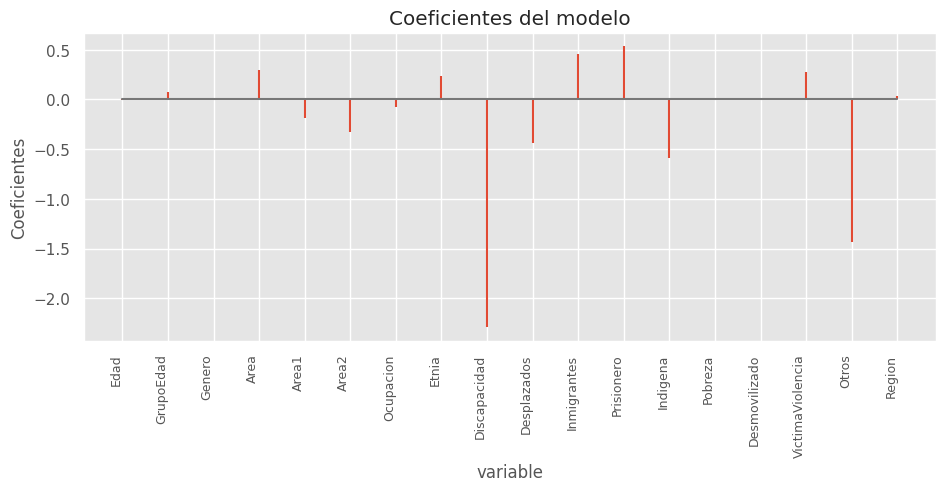

In [658]:
# Coeficientes del modelo
# ==============================================================================
coefficients = lasso_model.coef_
intercept = lasso_model.intercept_
print("")
print("Coeficientes:", coefficients)
print("Intercepto:", intercept)
print("")
dfDenge_coeficientes = pd.DataFrame({'predictor': X.columns, 'coef': lasso_model.coef_[0]})

fig, ax = plt.subplots(figsize=(11, 4))
ax.stem(dfDenge_coeficientes.predictor, dfDenge_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=9)
ax.set_xlabel('variable')
ax.set_ylabel('Coeficientes')
ax.set_title('Coeficientes del modelo');

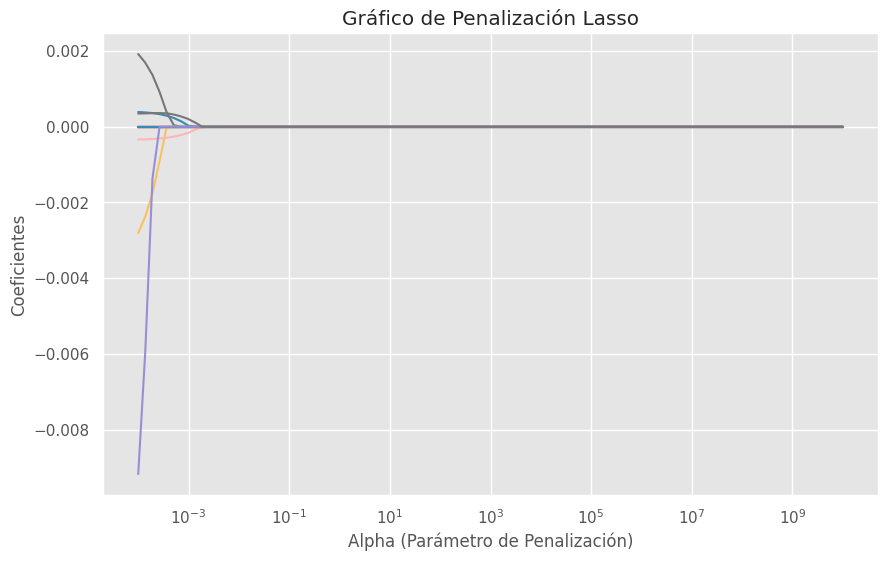

In [659]:
# Crear una lista de valores de alpha para la penalización Lasso
alphas = np.logspace(-4, 10, 100)
# Crear una lista para almacenar los coeficientes para cada valor de alpha
coefs = []
# Iterar sobre los valores de alpha y ajustar el modelo Lasso
for alpha in alphas:
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X_train, y_train)
    coefs.append(lasso_model.coef_)

# Convertir la lista de coeficientes a un array NumPy
coefs = np.array(coefs)

# Graficar la penalización Lasso
plt.figure(figsize=(10, 6))
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('Alpha (Parámetro de Penalización)')
plt.ylabel('Coeficientes')
plt.title('Gráfico de Penalización Lasso')
#plt.legend(X.columns)
plt.show()

##Modelo LogisticRegression con regularización Logit-Ridge


In [660]:
# Ajustar modelo Logit-Ridge
ridge_model = LogisticRegression(C = 0.1, ### parametro de penalización, valores menores a uno penalizacion alta
                                 class_weight= 'balanced',
                                 penalty= 'l2',  ## Elgir como penalizar: l1, l2, elasticnet, None
                                 solver= 'liblinear', ### Algoritmo de optimización
                                 random_state=42)
ridge_model.fit(X_train, y_train)
y_pred_ridge_model = ridge_model.predict(X_test)


In [661]:
print("=========================================================.")
ridge_model_precision_score = precision_score(y_test, y_pred_ridge_model, average='macro')
print("Precisión del Modelo LogisticRegression con Ridge el set de Pruebas: {:.4f}".format(ridge_model_precision_score))
ridge_model_recall_score = recall_score(y_test, y_pred_ridge_model, average='macro')
print('Recall del Modelo LogisticRegression con con Ridge el set de Pruebas: {:.4f}'.format(ridge_model_recall_score))
ridge_model_f1_score = f1_score(y_test, y_pred_ridge_model, average='macro')
print('F1 Score del Modelo LogisticRegression con Ridge con el set de Pruebas: {:.4f}'.format(ridge_model_f1_score))
print("=========================================================.")
scores = cross_val_score(ridge_model,X_train,y_train,cv=5,scoring='roc_auc',n_jobs=-1)
ridge_model_roc_auc = scores.mean()
print("AUC Cross Val Score del set de entrenamiento: {:.4f}".format(ridge_model_roc_auc))
acc = cross_val_score(ridge_model,X_train,y_train,cv=5,scoring='accuracy',n_jobs=-1)
ridge_model_accv = acc.mean()
print("Accuracy Cross Val Score del Modelo LogisticRegression con Ridge para el set de entrenamiento: {:.4f}".format(ridge_model_accv))
ridge_model_score_train = ridge_model.score(X_train, y_train)
print("Accuracy del Modelo LogisticRegression con Ridge del set de entrenamiento set: {:.4f}".format(ridge_model_score_train))
ridge_model_score_test = ridge_model.score(X_test, y_test)
print("Accuracy del Modelo LogisticRegression con Ridge del set de pruebas: {:.4f}".format(ridge_model_score_test))

=========================================================.
Precisión del Modelo LogisticRegression con Ridge el set de Pruebas: 0.5025
Recall del Modelo LogisticRegression con con Ridge el set de Pruebas: 0.6013
F1 Score del Modelo LogisticRegression con Ridge con el set de Pruebas: 0.3964
=========================================================.
AUC Cross Val Score del set de entrenamiento: 0.5613
Accuracy Cross Val Score del Modelo LogisticRegression con Ridge para el set de entrenamiento: 0.6434
Accuracy del Modelo LogisticRegression con Ridge del set de entrenamiento set: 0.6300
Accuracy del Modelo LogisticRegression con Ridge del set de pruebas: 0.6340



Coeficientes: [[-8.50439631e-04  7.77482534e-02  1.60169129e-02  2.99254371e-01
  -2.64200840e-01 -2.64200840e-01 -7.70977715e-02  2.50401010e-01
  -1.42189378e+00 -5.45012447e-01  5.47257181e-01  7.74827506e-01
  -9.18566471e-01 -5.30221476e-01 -4.33187073e-01  5.85668265e-01
  -1.35313354e+00  3.67836632e-02]]
Intercepto: [1.06641327]



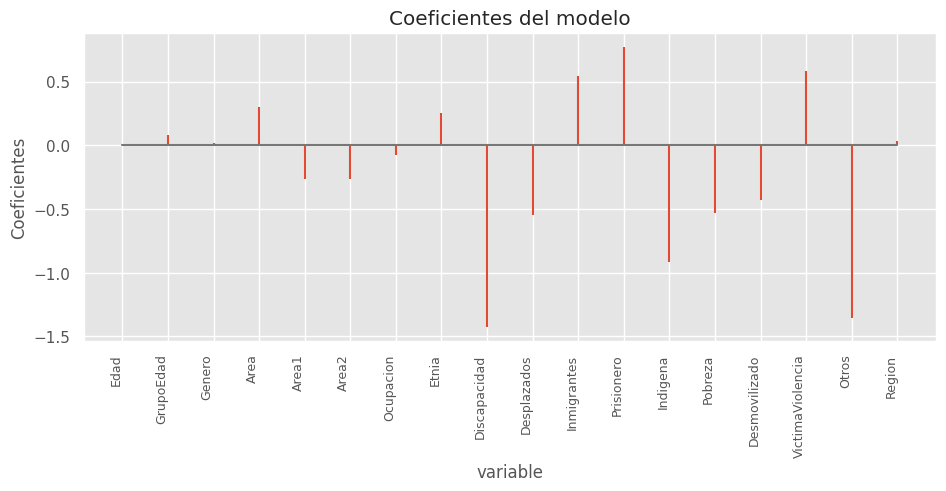

In [662]:
# Coeficientes del modelo Ridge
# ==============================================================================
coefficients = ridge_model.coef_
intercept = ridge_model.intercept_
print("")
print("Coeficientes:", coefficients)
print("Intercepto:", intercept)
print("")
dfDenge_coeficientes = pd.DataFrame({'predictor': X.columns, 'coef': ridge_model.coef_[0]})

fig, ax = plt.subplots(figsize=(11, 4))
ax.stem(dfDenge_coeficientes.predictor, dfDenge_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=9)
ax.set_xlabel('variable')
ax.set_ylabel('Coeficientes')
ax.set_title('Coeficientes del modelo');

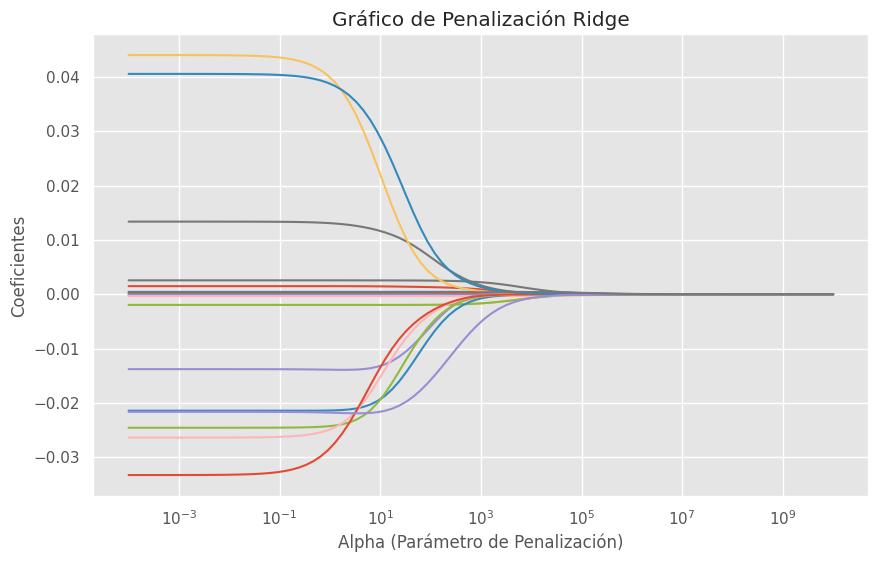

In [663]:
# Crear una lista de valores de alpha para la penalización Lasso
alphas = np.logspace(-4, 10, 100)
# Crear una lista para almacenar los coeficientes para cada valor de alpha
coefs = []
# Iterar sobre los valores de alpha y ajustar el modelo Lasso
for alpha in alphas:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train, y_train)
    coefs.append(ridge_model.coef_)

# Convertir la lista de coeficientes a un array NumPy
coefs = np.array(coefs)

# Graficar la penalización Lasso
plt.figure(figsize=(10, 6))
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('Alpha (Parámetro de Penalización)')
plt.ylabel('Coeficientes')
plt.title('Gráfico de Penalización Ridge')
#plt.legend(X.columns)
plt.show()

In [664]:
# Ajustar modelo Logit-Enet
enet_model = LogisticRegression(
    C = 0.1,
    class_weight= 'balanced',
    penalty= 'elasticnet',
    solver= 'saga',
    random_state=42,
    l1_ratio=0.5
    )

enet_model.fit(X_train, y_train)
y_pred_enet_model = enet_model.predict(X_test)


In [665]:
print("=========================================================.")
enet_model_precision_score = precision_score(y_test, y_pred_enet_model, average='macro')
print("Precisión del Modelo LogisticRegression con Logit-Enet el set de Pruebas: {:.4f}".format(enet_model_precision_score))
enet_model_recall_score = recall_score(y_test, y_pred_enet_model, average='macro')
print('Recall del Modelo LogisticRegression con con Logit-Enet el set de Pruebas: {:.4f}'.format(enet_model_recall_score))
enet_model_f1_score = f1_score(y_test, y_pred_enet_model, average='macro')
print('F1 Score del Modelo LogisticRegression con Logit-Enet con el set de Pruebas: {:.4f}'.format(enet_model_f1_score))
print("=========================================================.")
scores = cross_val_score(enet_model,X_train,y_train,cv=5,scoring='roc_auc',n_jobs=-1)
enet_model_roc_auc = scores.mean()
print("AUC Cross Val Score del set de entrenamiento: {:.4f}".format(enet_model_roc_auc))
acc = cross_val_score(enet_model,X_train,y_train,cv=5,scoring='accuracy',n_jobs=-1)
enet_model_accv = acc.mean()
print("Accuracy Cross Val Score del Modelo LogisticRegression con Logit-Enet para el set de entrenamiento: {:.4f}".format(enet_model_accv))
enet_model_score_train = enet_model.score(X_train, y_train)
print("Accuracy del Modelo LogisticRegression con Logit-Enet del set de entrenamiento set: {:.4f}".format(enet_model_score_train))
enet_model_score_test = enet_model.score(X_test, y_test)
print("Accuracy del Modelo LogisticRegression con Logit-Enet del set de pruebas: {:.4f}".format(enet_model_score_test))

=========================================================.
Precisión del Modelo LogisticRegression con Logit-Enet el set de Pruebas: 0.5044
Recall del Modelo LogisticRegression con con Logit-Enet el set de Pruebas: 0.5102
F1 Score del Modelo LogisticRegression con Logit-Enet con el set de Pruebas: 0.5053
=========================================================.
AUC Cross Val Score del set de entrenamiento: 0.5287
Accuracy Cross Val Score del Modelo LogisticRegression con Logit-Enet para el set de entrenamiento: 0.3180
Accuracy del Modelo LogisticRegression con Logit-Enet del set de entrenamiento set: 0.9808
Accuracy del Modelo LogisticRegression con Logit-Enet del set de pruebas: 0.9808


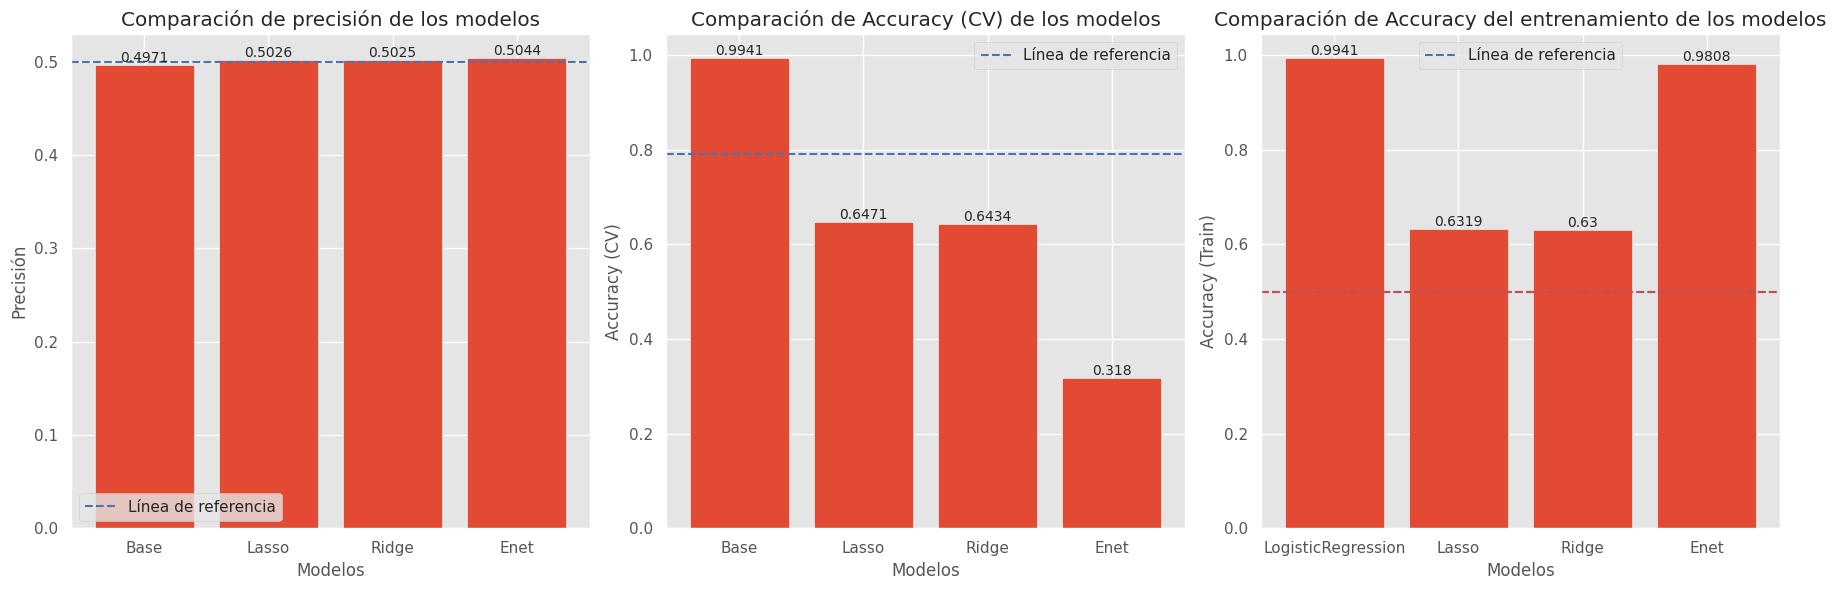

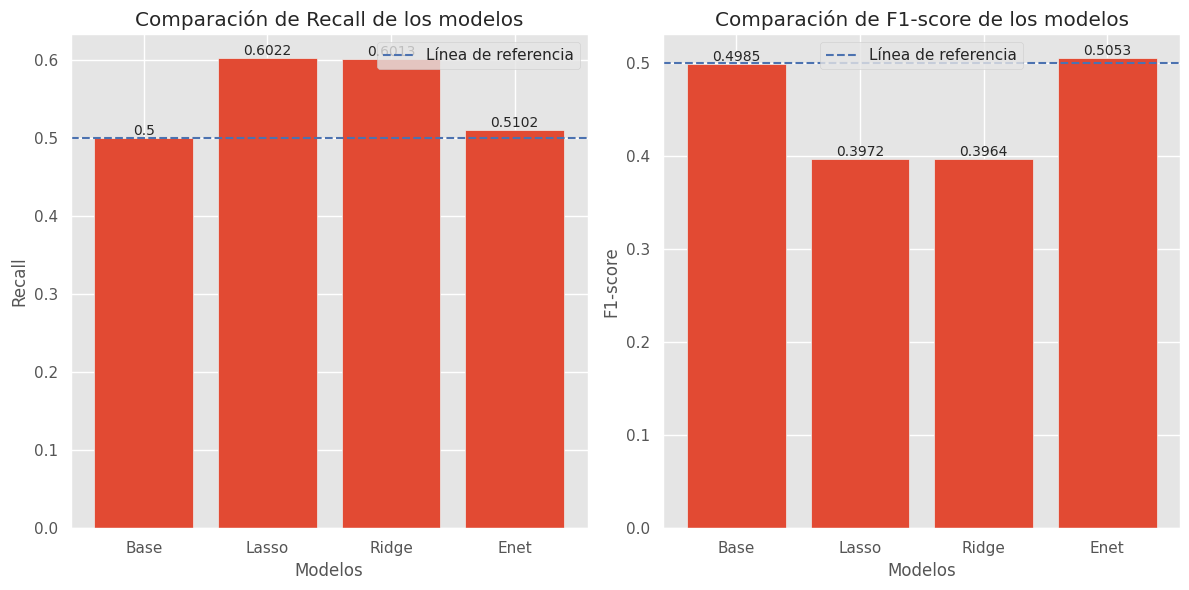

In [666]:


# Datos de recall para cada modelo
recall_scores = {
    'Base': logitreg_model_recall_score,
    'Lasso': lasso_model_recall_score,
    'Ridge': ridge_model_recall_score,
    'Enet': enet_model_recall_score,
}

# Datos de precisión para cada modelo
precision_scores = {
    'Base': logitreg_model_precision_score,
    'Lasso': lasso_model_precision_score,
    'Ridge': ridge_model_precision_score,
    'Enet': enet_model_precision_score,
}

# Datos de accuracy para cada modelo
accuracy_scores = {
    'Base': logitreg_model_accv,
    'Lasso': lasso_model_accv,
    'Ridge': ridge_model_accv,
    'Enet': enet_model_accv,
}

# Datos de accuracy para el entrenamiento de cada modelo
accuracy_scores_train = {
    'LogisticRegression': logitreg_model_score_train,
    'Lasso': lasso_model_score_train,
    'Ridge': ridge_model_score_train,
    'Enet': enet_model_score_train,
}


# Crear una figura con subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))


# Gráfico 1: Precisión
models = list(precision_scores.keys())
scores = list(precision_scores.values())

axes[0].bar(models, scores)
#axes[0].set_ylim(0.5, 1)
axes[0].set_xlabel('Modelos')
axes[0].set_ylabel('Precisión')
axes[0].set_title('Comparación de precisión de los modelos')
for i, score in enumerate(scores):
  axes[0].text(i, score, str(round(score, 4)), ha='center', va='bottom')

axes[0].axhline(y=0.5, color='b', linestyle='--', label='Línea de referencia')
axes[0].legend()


# Gráfico 2: Accuracy (Cross-Validation)
models = list(accuracy_scores.keys())
scores = list(accuracy_scores.values())

axes[1].bar(models, scores)
#axes[1].set_ylim(0.5, 1)
axes[1].set_xlabel('Modelos')
axes[1].set_ylabel('Accuracy (CV)')
axes[1].set_title('Comparación de Accuracy (CV) de los modelos')
for i, score in enumerate(scores):
  axes[1].text(i, score, str(round(score, 4)), ha='center', va='bottom')

axes[1].axhline(y=0.79, color='b', linestyle='--', label='Línea de referencia')
axes[1].legend()

# Gráfico 3: Accuracy del entrenamiento
models = list(accuracy_scores_train.keys())
scores = list(accuracy_scores_train.values())

axes[2].bar(models, scores)
#axes[2].set_ylim(0.5, 1)
axes[2].set_xlabel('Modelos')
axes[2].set_ylabel('Accuracy (Train)')
axes[2].set_title('Comparación de Accuracy del entrenamiento de los modelos')
for i, score in enumerate(scores):
  axes[2].text(i, score, str(round(score, 4)), ha='center', va='bottom')

axes[2].axhline(y=0.5, color='b', linestyle='--', label='Línea de referencia')
axes[2].legend()

# Ajustar los subplots para evitar superposiciones
plt.tight_layout()

# Agregar una línea horizontal para comparar
plt.axhline(y=0.5, color='r', linestyle='--')

# Mostrar la figura
plt.show()

# Datos de recall para cada modelo
recall_scores = {
    'Base': logitreg_model_recall_score,
    'Lasso': lasso_model_recall_score,
    'Ridge': ridge_model_recall_score,
    'Enet': enet_model_recall_score,
}

# Datos de F1-score para cada modelo
f1_scores = {
    'Base': logitreg_model_f1_score,
    'Lasso': lasso_model_f1_score,
    'Ridge': ridge_model_f1_score,
    'Enet': enet_model_f1_score,
}

# Crear una figura con subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Gráfico 1: Recall
models = list(recall_scores.keys())
scores = list(recall_scores.values())

axes[0].bar(models, scores)
#axes[0].set_ylim(0.5, 1)
axes[0].set_xlabel('Modelos')
axes[0].set_ylabel('Recall')
axes[0].set_title('Comparación de Recall de los modelos')
for i, score in enumerate(scores):
  axes[0].text(i, score, str(round(score, 4)), ha='center', va='bottom')

axes[0].axhline(y=0.5, color='b', linestyle='--', label='Línea de referencia')
axes[0].legend()

# Gráfico 2: F1-score
models = list(f1_scores.keys())
scores = list(f1_scores.values())

axes[1].bar(models, scores)
#axes[1].set_ylim(0.5, 1)
axes[1].set_xlabel('Modelos')
axes[1].set_ylabel('F1-score')
axes[1].set_title('Comparación de F1-score de los modelos')
for i, score in enumerate(scores):
  axes[1].text(i, score, str(round(score, 4)), ha='center', va='bottom')

axes[1].axhline(y=0.5, color='b', linestyle='--', label='Línea de referencia')
axes[1].legend()
# Ajustar los subplots para evitar superposiciones
plt.tight_layout()

# Mostrar la figura
plt.show()

El estudio realizado analiza la capacidad predictiva de diferentes modelos de regresión logística para predecir la ocurrencia de eventos de dengue utilizando variables sociodemográficas.  Se evaluaron modelos sin regularización y con regularización LASSO, Ridge y Elastic Net.

Obtenemos una precisión del modelo usando average='weighted' dado que, el uso de weighted-promedio es una buena medida para evaluar el rendimiento del modelo cuando se trabaja con un problema de clasificación con clases desbalanceadas ya que tiene en cuenta el des.
La precesión del modelo en relación del set de pruebas con la predicción es de **0.4971**
Indica que el modelo no tiene un buen desempeño, y la precisión en la predicción de la variable objetivo **"Evento"**' no es relativamente baja. El que alcanzó un mejor desempeño de los 4 fue el modelo usando Lasso con una precesión de **0.5026**

En el contexto del modelo para predecir "Dengue" o "Dengue Grave", un F1 Score de 0,5 sugiere que el modelo tiene un nivel promedio de rendimiento en cuanto a la capacidad de clasificar correctamente y minimizar tanto los falsos positivos como los falsos negativos lo que también se evidencia en el cálculo anterior de la precisión del modelo. El que alcanzó un mejor desempeño de los 4 fue el modelo usando Elastic Net con un valor de **0.5053**

En el caso de la predicción de enfermedades como el dengue, un Recall bajo podría ser un problema, porque significa que se podrían estar pasando por alto casos positivos reales, en nuestro caso un Recall de 0.5 para la clase Evento significaría que el modelo solo identifica la mitad de los casos reales de dengue. El que alcanzó un mejor desempeño de los 4 fue el modelo usando Lasso con un valor de **0.6022**
Para el caso de predicción de enfermedades como se presenta en el caso de estudio, un Recall alto es deseable para poder identificar correctamente la mayoría de los casos positivos reales.

* Se revisa la proporción de los datos de los Eventos antes y después del split del dataset y se observa que se conserva la proporción.

* Los modelos de regresión logística no demostraron un buen desempeño menor que aceptable en la predicción de eventos de dengue, con valores de precisión, Recall y F1-score cercanos a 0.5 en la mayoría de los casos.

* Los modelos con regularización  mejoraron el desempeño en los datos de entrenamiento, pero se observó una disminución considerable en la precisión en los datos de prueba. Esto indica un posible sobreajuste (overfitting).




#Modelos *Clínico*-médico

###Filtrando las variables clínico-medicas

Para poder evaluar la capacidad predictiva de cada modelo, se dividen las observaciones disponibles en dos grupos: uno de entrenamiento (70%) y otro de test (30%).

<Axes: >

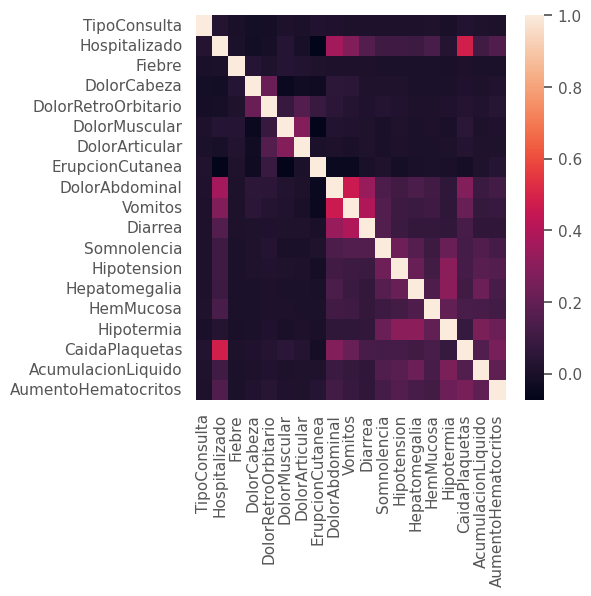

In [667]:
clinico_med_vars =  ['TipoConsulta', 'Hospitalizado', 'Fiebre', 'DolorCabeza', 'DolorRetroOrbitario', 'DolorMuscular', 'DolorArticular', 'ErupcionCutanea', 'DolorAbdominal', 'Vomitos', 'Diarrea', 'Somnolencia', 'Hipotension', 'Hepatomegalia', 'HemMucosa', 'Hipotermia', 'CaidaPlaquetas', 'AcumulacionLiquido', 'AumentoHematocritos']

df_socio_clinic = dfDengue[clinico_med_vars]

correlation_matrix = df_socio_clinic.corr()

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (5, 5))
sns.heatmap(correlation_matrix, ax = ax)

In [668]:
unique_nombre_Hospitalizado_counts = dfDengue['Hospitalizado'].value_counts()
print(unique_nombre_Hospitalizado_counts)

Hospitalizado
0    35437
1    14960
Name: count, dtype: int64


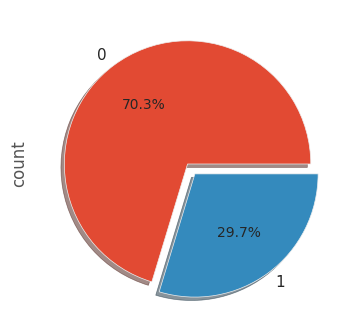

In [669]:
plt.figure(figsize=[4,4])
dfDengue['Hospitalizado'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',shadow=True)
plt.show()

In [670]:
dfDengueClinicoMed = dfDengue[clinico_med_vars].copy()

# Definir variables predictoras (X) y variable objetivo (y)
X = dfDengueClinicoMed.drop('Hospitalizado', axis=1)
y = (dfDengueClinicoMed['Hospitalizado']).astype(int)
y = y.values.ravel()

# Escalar las variables predictoras
#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)

In [671]:
from sklearn.preprocessing import MinMaxScaler

# Dividir los datos en conjuntos de entrenamiento y prueba (opcional, para evaluar el modelo)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = MinMaxScaler() #saga solver requires features to be scaled for model conversion

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [672]:
# Porcentaje de los valores unicos de , y_train
unique_y_train_counts = pd.Series(y_train).value_counts(normalize=True) * 100
unique_y_train_counts

,proportion
0,70.252572
1,29.747428


##Modelo LogisticRegression sin regularización


In [673]:
#LogisticRegression
logitreg_model = LogisticRegression(penalty=None)
logitreg_model.fit(X_train, y_train)
y_pred = logitreg_model.predict(X_test)


In [674]:
print("Usaremos estas métricas como comparación de referencia para cualquier mejora que obtengamos con la regularizacion Logit-Ridge, Logit-LASSO y Logit-Enet")
print("=========================================================.")
logitreg_model_precision_score = precision_score(y_test, y_pred, average='weighted')
print("Precisión del Modelo LogisticRegression con el set de Pruebas: {:.4f}".format(logitreg_model_precision_score))
logitreg_model_recall_score = recall_score(y_test, y_pred, average='weighted')
print('Recall del Modelo LogisticRegression con el set de Pruebas: {:.4f}'.format(logitreg_model_recall_score))
logitreg_model_f1_score = f1_score(y_test, y_pred, average='weighted')
print('F1 Score del Modelo LogisticRegression con el set de Pruebas: {:.4f}'.format(logitreg_model_f1_score))
print("=========================================================.")
scores = cross_val_score(logitreg_model,X_train,y_train,cv=5,scoring='roc_auc',n_jobs=-1)
logitreg_model_roc_auc = scores.mean()
print("AUC Cross Val Score del set de entrenamiento: {:.4f}".format(logitreg_model_roc_auc))
acc = cross_val_score(logitreg_model,X_train,y_train,cv=5,scoring='accuracy',n_jobs=-1)
logitreg_model_accv = acc.mean()
print("Accuracy Cross Val Score del Modelo LogisticRegression para el set de entrenamiento: {:.4f}".format(logitreg_model_accv))
logitreg_model_score_train = logitreg_model.score(X_train, y_train)
print("Accuracy del Modelo LogisticRegression del set de entrenamiento set: {:.4f}".format(logitreg_model_score_train))
logitreg_model_score_test = logitreg_model.score(X_test, y_test)
print("Accuracy del Modelo LogisticRegression del set de pruebas: {:.4f}".format(logitreg_model_score_test))
# Error de test del modelo
# ==============================================================================
logitreg_model_rmse_ols = mean_squared_error(y_test, y_pred, squared = False )
print("El error (rmse) de test es: {:.4f}".format(logitreg_model_rmse_ols))

Usaremos estas métricas como comparación de referencia para cualquier mejora que obtengamos con la regularizacion Logit-Ridge, Logit-LASSO y Logit-Enet
=========================================================.
Precisión del Modelo LogisticRegression con el set de Pruebas: 0.7858
Recall del Modelo LogisticRegression con el set de Pruebas: 0.7946
F1 Score del Modelo LogisticRegression con el set de Pruebas: 0.7840
=========================================================.
AUC Cross Val Score del set de entrenamiento: 0.8299
Accuracy Cross Val Score del Modelo LogisticRegression para el set de entrenamiento: 0.7936
Accuracy del Modelo LogisticRegression del set de entrenamiento set: 0.7941
Accuracy del Modelo LogisticRegression del set de pruebas: 0.7946
El error (rmse) de test es: 0.4532


In [675]:
residuals_logitreg_model = y_test - y_pred
print("Media de los resideales:", np.mean(residuals_logitreg_model))
print("Desviación estándar de los residuales:", np.std(residuals_logitreg_model))

Media de los resideales: 0.08029100529100529
Desviación estándar de los residuales: 0.4460679711575807



Coeficientes: [[ 1.69405147 -0.51559075 -0.40726208 -0.12744185  0.06727224 -0.14579614
  -0.34648925  1.13377242  0.55321914  0.04239808  0.18277696  0.47300195
   0.42347637  0.69171068 -2.35293212  2.15647518  0.61619306  0.40618646]]
Intercepto: [-0.8835427]



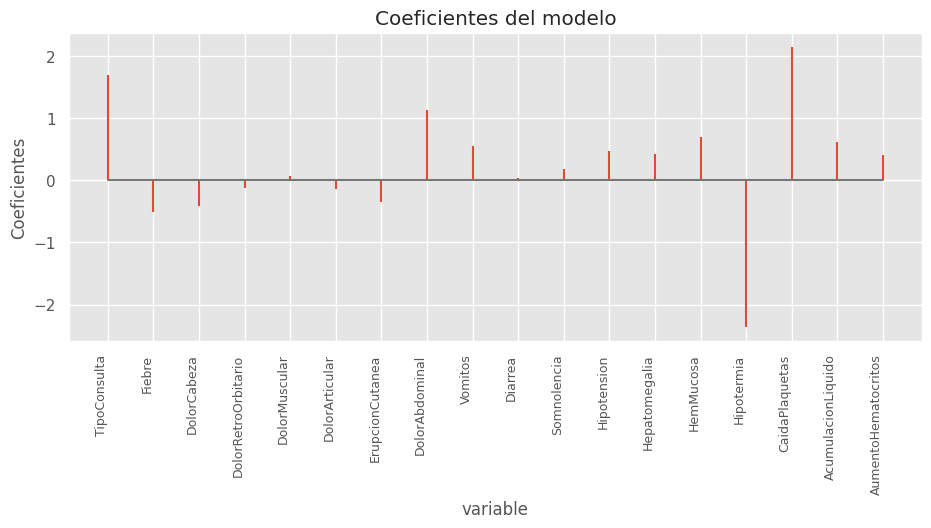

In [676]:
# Coeficientes del modelo
# ==============================================================================
coefficients = logitreg_model.coef_
intercept = logitreg_model.intercept_
print("")
print("Coeficientes:", coefficients)
print("Intercepto:", intercept)
print("")
dfDenge_coeficientes = pd.DataFrame({'predictor': X.columns, 'coef': logitreg_model.coef_[0]})

fig, ax = plt.subplots(figsize=(11, 4))
ax.stem(dfDenge_coeficientes.predictor, dfDenge_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=9)
ax.set_xlabel('variable')
ax.set_ylabel('Coeficientes')
ax.set_title('Coeficientes del modelo');

##Modelo LogisticRegression con regularización Logit-Lasso


In [677]:
lasso_model = LogisticRegression(random_state=42,
                                 C = 0.1, ### parametro de penalización, valores menores a uno penalizacion alta
                                 class_weight= 'balanced',
                                 penalty= 'l1', ## Elgir como penalizar: l1, l2, elasticnet, None
                                 solver= 'liblinear' ### Algoritmo de optimización
                                 )
lasso_model.fit(X_train, y_train) #This line is added to train the model
y_pred_lasso_model = lasso_model.predict(X_test)

In [678]:
print("=========================================================.")
lasso_model_precision_score = precision_score(y_test, y_pred_lasso_model, average='weighted')
print("Precisión del Modelo LogisticRegression con LASSO el set de Pruebas: {:.4f}".format(lasso_model_precision_score))
lasso_model_recall_score = recall_score(y_test, y_pred_lasso_model, average='weighted')
print('Recall del Modelo LogisticRegression con con LASSO el set de Pruebas: {:.4f}'.format(lasso_model_recall_score))
lasso_model_f1_score = f1_score(y_test, y_pred_lasso_model, average='weighted')
print('F1 Score del Modelo LogisticRegression con LASSO con el set de Pruebas: {:.4f}'.format(lasso_model_f1_score))
print("=========================================================.")
scores = cross_val_score(lasso_model,X_train,y_train,cv=5,scoring='roc_auc',n_jobs=-1)
lasso_model_roc_auc = scores.mean()
print("AUC Cross Val Score del set de entrenamiento: {:.4f}".format(lasso_model_roc_auc))
acc = cross_val_score(lasso_model,X_train,y_train,cv=5,scoring='accuracy',n_jobs=-1)
lasso_model_accv = acc.mean()
print("Accuracy Cross Val Score del Modelo LogisticRegression con LASSO para el set de entrenamiento: {:.4f}".format(lasso_model_accv))
lasso_model_score_train = lasso_model.score(X_train, y_train)
print("Accuracy del Modelo LogisticRegression con LASSO del set de entrenamiento set: {:.4f}".format(lasso_model_score_train))
lasso_model_score_test = lasso_model.score(X_test, y_test)
print("Accuracy del Modelo LogisticRegression con LASSO del set de pruebas: {:.4f}".format(lasso_model_score_test))

=========================================================.
Precisión del Modelo LogisticRegression con LASSO el set de Pruebas: 0.7959
Recall del Modelo LogisticRegression con con LASSO el set de Pruebas: 0.7828
F1 Score del Modelo LogisticRegression con LASSO con el set de Pruebas: 0.7873
=========================================================.
AUC Cross Val Score del set de entrenamiento: 0.8291
Accuracy Cross Val Score del Modelo LogisticRegression con LASSO para el set de entrenamiento: 0.7828
Accuracy del Modelo LogisticRegression con LASSO del set de entrenamiento set: 0.7834
Accuracy del Modelo LogisticRegression con LASSO del set de pruebas: 0.7828



Coeficientes: [[ 0.          0.         -0.43122807 -0.14295073  0.04016511 -0.15179909
  -0.37611032  1.17714069  0.61114703  0.04966828  0.17948778  0.43923717
   0.33945589  0.75325382 -1.25269399  2.20402649  0.50326122  0.36486878]]
Intercepto: [-0.49647861]



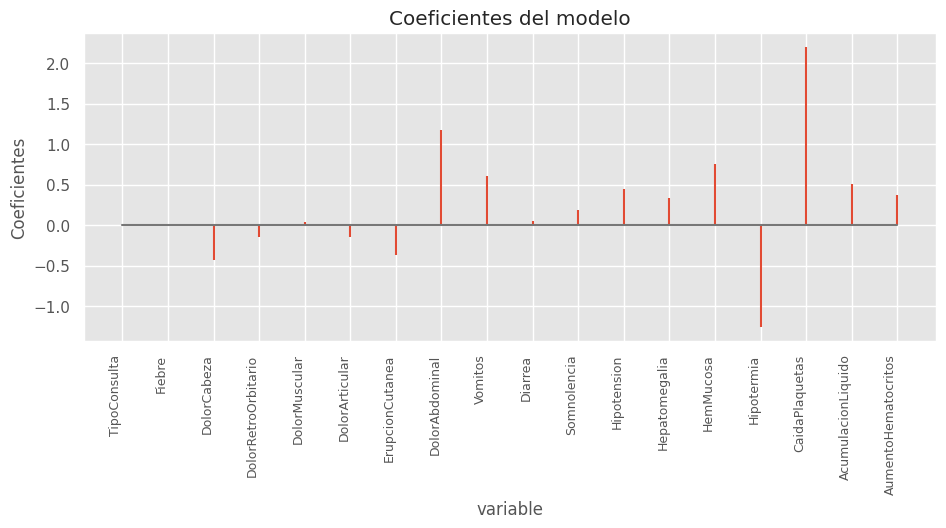

In [679]:
# Coeficientes del modelo
# ==============================================================================
coefficients = lasso_model.coef_
intercept = lasso_model.intercept_
print("")
print("Coeficientes:", coefficients)
print("Intercepto:", intercept)
print("")
dfDenge_coeficientes = pd.DataFrame({'predictor': X.columns, 'coef': lasso_model.coef_[0]})

fig, ax = plt.subplots(figsize=(11, 4))
ax.stem(dfDenge_coeficientes.predictor, dfDenge_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=9)
ax.set_xlabel('variable')
ax.set_ylabel('Coeficientes')
ax.set_title('Coeficientes del modelo');

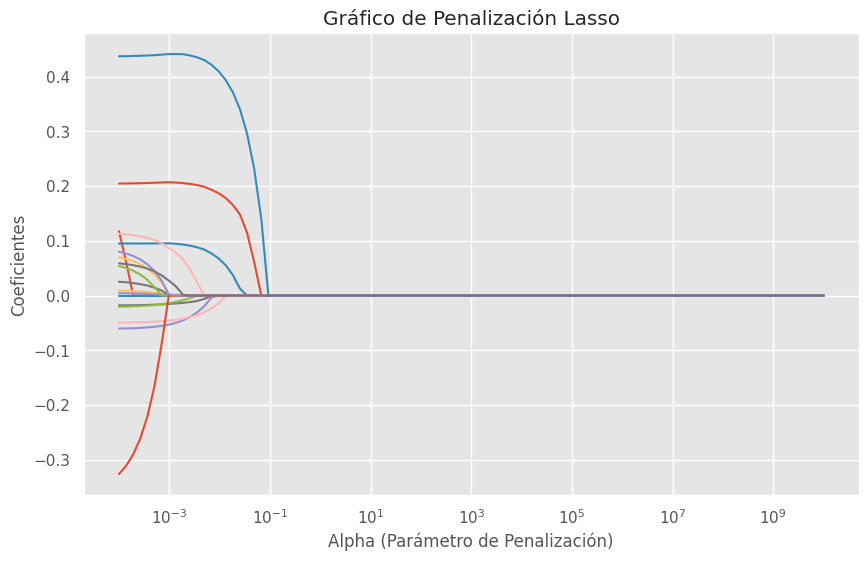

In [680]:
# Crear una lista de valores de alpha para la penalización Lasso
alphas = np.logspace(-4, 10, 100)
# Crear una lista para almacenar los coeficientes para cada valor de alpha
coefs = []
# Iterar sobre los valores de alpha y ajustar el modelo Lasso
for alpha in alphas:
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X_train, y_train)
    coefs.append(lasso_model.coef_)

# Convertir la lista de coeficientes a un array NumPy
coefs = np.array(coefs)

# Graficar la penalización Lasso
plt.figure(figsize=(10, 6))
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('Alpha (Parámetro de Penalización)')
plt.ylabel('Coeficientes')
plt.title('Gráfico de Penalización Lasso')
#plt.legend(X.columns)
plt.show()

##Modelo LogisticRegression con regularización Logit-Ridge


In [681]:
# Ajustar modelo Logit-Ridge
ridge_model = LogisticRegression(C = 0.1, ### parametro de penalización, valores menores a uno penalizacion alta
                                 class_weight= 'balanced',
                                 penalty= 'l2',  ## Elgir como penalizar: l1, l2, elasticnet, None
                                 solver= 'liblinear', ### Algoritmo de optimización
                                 random_state=42)
ridge_model.fit(X_train, y_train)
y_pred_ridge_model = ridge_model.predict(X_test)



print("=========================================================.")
ridge_model_precision_score = precision_score(y_test, y_pred_ridge_model, average='weighted')
print("Precisión del Modelo LogisticRegression con Ridge el set de Pruebas: {:.4f}".format(ridge_model_precision_score))
ridge_model_recall_score = recall_score(y_test, y_pred_ridge_model, average='weighted')
print('Recall del Modelo LogisticRegression con con Ridge el set de Pruebas: {:.4f}'.format(ridge_model_recall_score))
ridge_model_f1_score = f1_score(y_test, y_pred_ridge_model, average='weighted')
print('F1 Score del Modelo LogisticRegression con Ridge con el set de Pruebas: {:.4f}'.format(ridge_model_f1_score))
print("=========================================================.")
scores = cross_val_score(ridge_model,X_train,y_train,cv=5,scoring='roc_auc',n_jobs=-1)
ridge_model_roc_auc = scores.mean()
print("AUC Cross Val Score del set de entrenamiento: {:.4f}".format(ridge_model_roc_auc))
acc = cross_val_score(ridge_model,X_train,y_train,cv=5,scoring='accuracy',n_jobs=-1)
ridge_model_accv = acc.mean()
print("Accuracy Cross Val Score del Modelo LogisticRegression con Ridge para el set de entrenamiento: {:.4f}".format(ridge_model_accv))
ridge_model_score_train = ridge_model.score(X_train, y_train)
print("Accuracy del Modelo LogisticRegression con Ridge del set de entrenamiento set: {:.4f}".format(ridge_model_score_train))
ridge_model_score_test = ridge_model.score(X_test, y_test)
print("Accuracy del Modelo LogisticRegression con Ridge del set de pruebas: {:.4f}".format(ridge_model_score_test))

=========================================================.
Precisión del Modelo LogisticRegression con Ridge el set de Pruebas: 0.7966
Recall del Modelo LogisticRegression con con Ridge el set de Pruebas: 0.7833
F1 Score del Modelo LogisticRegression con Ridge con el set de Pruebas: 0.7879
=========================================================.
AUC Cross Val Score del set de entrenamiento: 0.8301
Accuracy Cross Val Score del Modelo LogisticRegression con Ridge para el set de entrenamiento: 0.7834
Accuracy del Modelo LogisticRegression con Ridge del set de entrenamiento set: 0.7835
Accuracy del Modelo LogisticRegression con Ridge del set de pruebas: 0.7833



Coeficientes: [[ 0.5463972  -0.23306253 -0.42715123 -0.14659113  0.06568775 -0.15902555
  -0.37722438  1.16928313  0.61195134  0.06088231  0.2101375   0.48090201
   0.41656167  0.75791719 -1.21152098  2.18637327  0.56335092  0.40153449]]
Intercepto: [-0.28951663]



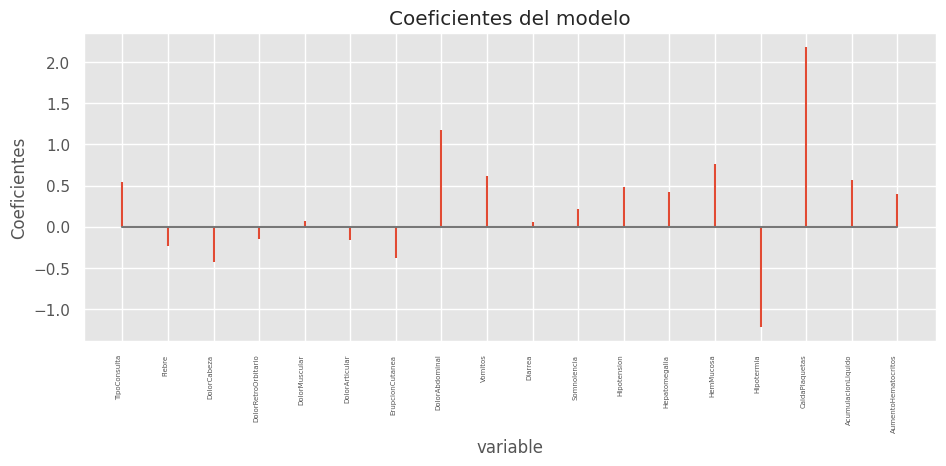

In [682]:

# Coeficientes del modelo Ridge
# ==============================================================================
coefficients = ridge_model.coef_
intercept = ridge_model.intercept_
print("")
print("Coeficientes:", coefficients)
print("Intercepto:", intercept)
print("")
dfDenge_coeficientes = pd.DataFrame({'predictor': X.columns, 'coef': ridge_model.coef_[0]})

fig, ax = plt.subplots(figsize=(11, 4))
ax.stem(dfDenge_coeficientes.predictor, dfDenge_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=5)
ax.set_xlabel('variable')
ax.set_ylabel('Coeficientes')
ax.set_title('Coeficientes del modelo');

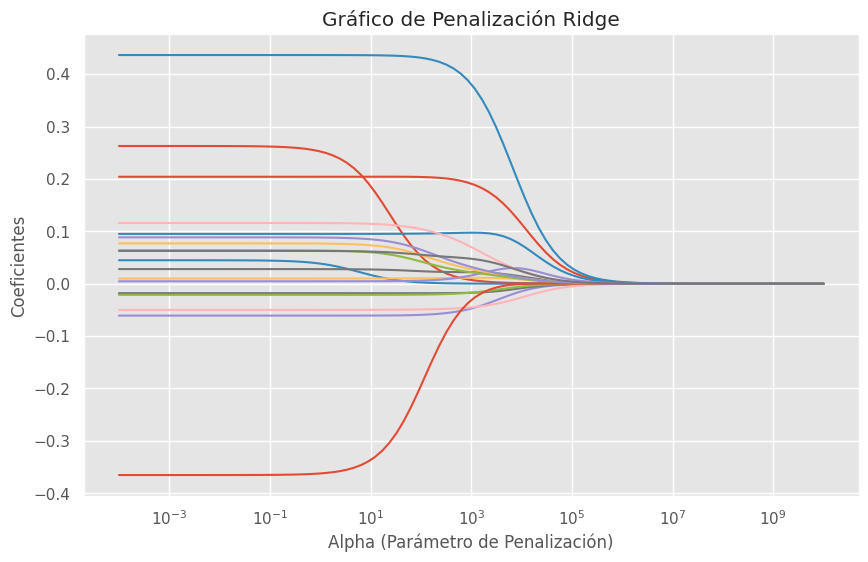

In [683]:
# Crear una lista de valores de alpha para la penalización Lasso
alphas = np.logspace(-4, 10, 100)
# Crear una lista para almacenar los coeficientes para cada valor de alpha
coefs = []
# Iterar sobre los valores de alpha y ajustar el modelo Lasso
for alpha in alphas:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train, y_train)
    coefs.append(ridge_model.coef_)

# Convertir la lista de coeficientes a un array NumPy
coefs = np.array(coefs)

# Graficar la penalización Lasso
plt.figure(figsize=(10, 6))
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('Alpha (Parámetro de Penalización)')
plt.ylabel('Coeficientes')
plt.title('Gráfico de Penalización Ridge')
#plt.legend(X.columns)
plt.show()

In [684]:

# Ajustar modelo Logit-Enet
enet_model = LogisticRegression(
    C = 0.1,
    class_weight= 'balanced',
    penalty= 'elasticnet',
    solver= 'saga',
    random_state=42,
    l1_ratio=0.5
    )

enet_model.fit(X_train, y_train)
y_pred_enet_model = enet_model.predict(X_test)


In [685]:
print("=========================================================.")
enet_model_precision_score = precision_score(y_test, y_pred_enet_model, average='weighted')
print("Precisión del Modelo LogisticRegression con Logit-Enet el set de Pruebas: {:.4f}".format(enet_model_precision_score))
enet_model_recall_score = recall_score(y_test, y_pred_enet_model, average='weighted')
print('Recall del Modelo LogisticRegression con con Logit-Enet el set de Pruebas: {:.4f}'.format(enet_model_recall_score))
enet_model_f1_score = f1_score(y_test, y_pred_enet_model, average='weighted')
print('F1 Score del Modelo LogisticRegression con Logit-Enet con el set de Pruebas: {:.4f}'.format(enet_model_f1_score))
print("=========================================================.")
scores = cross_val_score(enet_model,X_train,y_train,cv=5,scoring='roc_auc',n_jobs=-1)
enet_model_roc_auc = scores.mean()
print("AUC Cross Val Score del set de entrenamiento: {:.4f}".format(enet_model_roc_auc))
acc = cross_val_score(enet_model,X_train,y_train,cv=5,scoring='accuracy',n_jobs=-1)
enet_model_accv = acc.mean()
print("Accuracy Cross Val Score del Modelo LogisticRegression con Logit-Enet para el set de entrenamiento: {:.4f}".format(enet_model_accv))
enet_model_score_train = enet_model.score(X_train, y_train)
print("Accuracy del Modelo LogisticRegression con Logit-Enet del set de entrenamiento set: {:.4f}".format(enet_model_score_train))
enet_model_score_test = enet_model.score(X_test, y_test)
print("Accuracy del Modelo LogisticRegression con Logit-Enet del set de pruebas: {:.4f}".format(enet_model_score_test))


=========================================================.
Precisión del Modelo LogisticRegression con Logit-Enet el set de Pruebas: 0.7963
Recall del Modelo LogisticRegression con con Logit-Enet el set de Pruebas: 0.7833
F1 Score del Modelo LogisticRegression con Logit-Enet con el set de Pruebas: 0.7878
=========================================================.
AUC Cross Val Score del set de entrenamiento: 0.8301
Accuracy Cross Val Score del Modelo LogisticRegression con Logit-Enet para el set de entrenamiento: 0.7828
Accuracy del Modelo LogisticRegression con Logit-Enet del set de entrenamiento set: 0.7836
Accuracy del Modelo LogisticRegression con Logit-Enet del set de pruebas: 0.7833


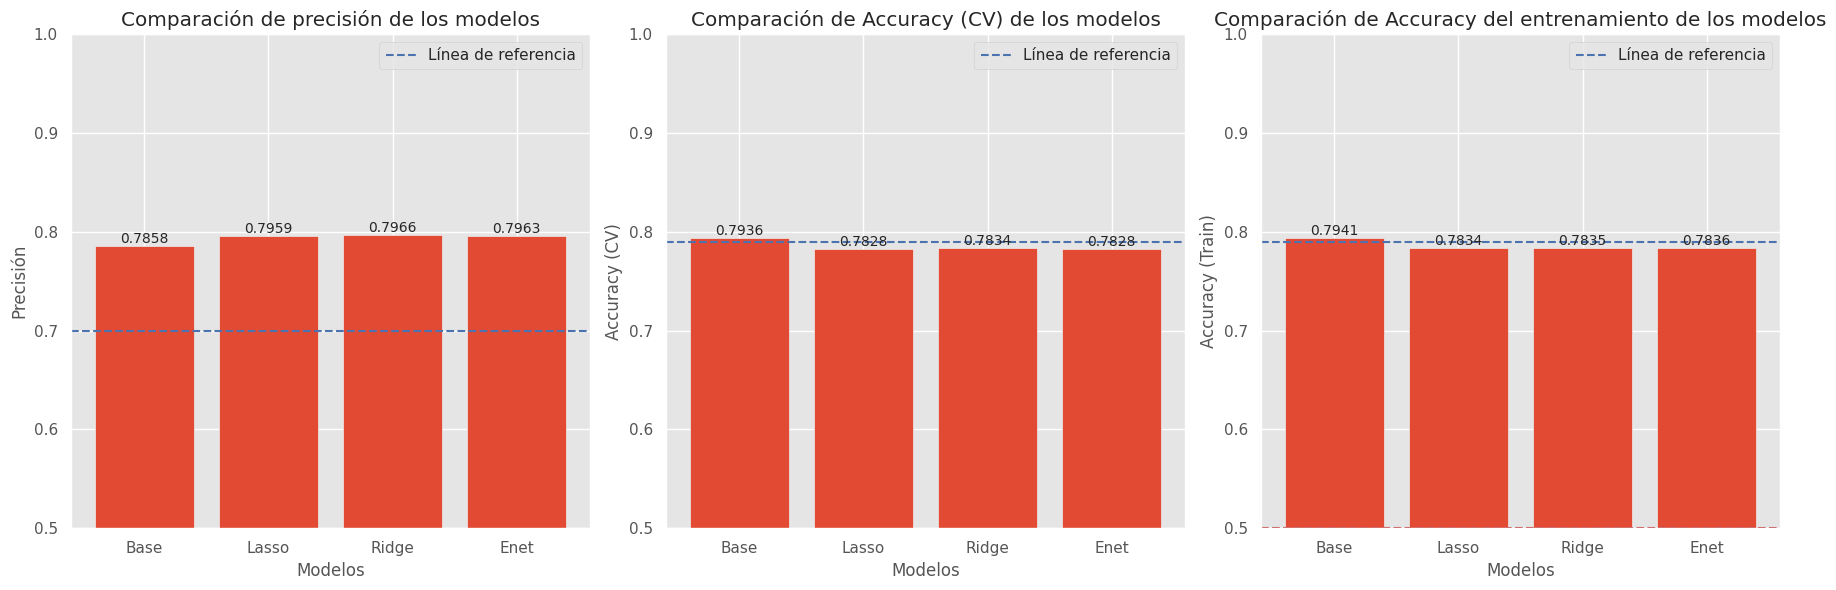

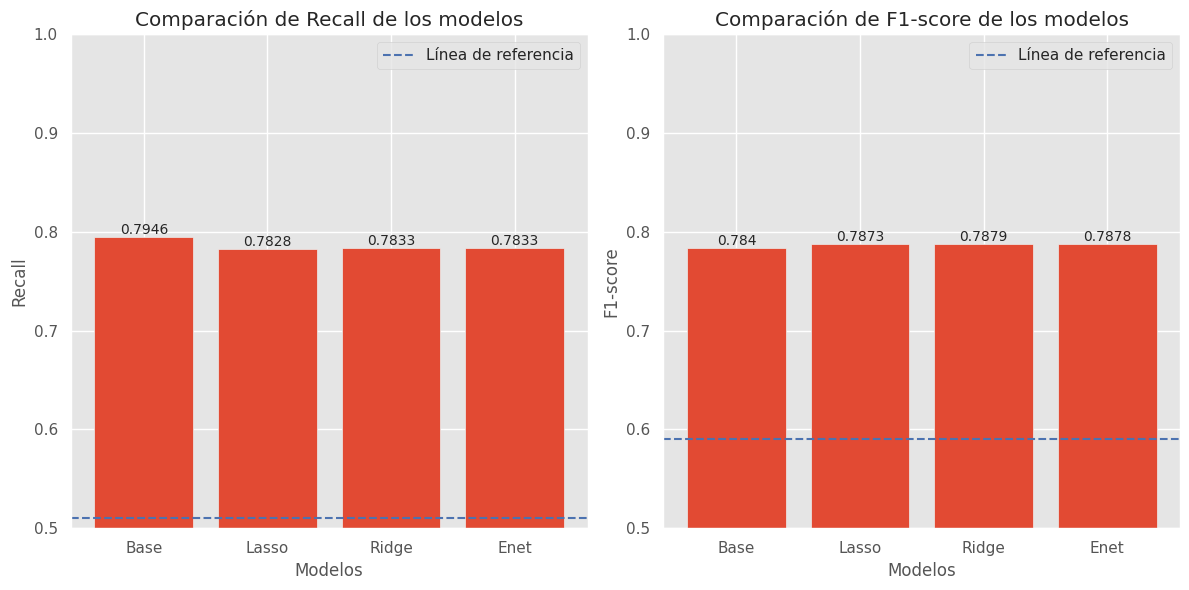

In [686]:


# Datos de recall para cada modelo
recall_scores = {
    'Base': logitreg_model_recall_score,
    'Lasso': lasso_model_recall_score,
    'Ridge': ridge_model_recall_score,
    'Enet': enet_model_recall_score,
}

# Datos de precisión para cada modelo
precision_scores = {
    'Base': logitreg_model_precision_score,
    'Lasso': lasso_model_precision_score,
    'Ridge': ridge_model_precision_score,
    'Enet': enet_model_precision_score,
}

# Datos de accuracy para cada modelo
accuracy_scores = {
    'Base': logitreg_model_accv,
    'Lasso': lasso_model_accv,
    'Ridge': ridge_model_accv,
    'Enet': enet_model_accv,
}

# Datos de accuracy para el entrenamiento de cada modelo
accuracy_scores_train = {
    'Base': logitreg_model_score_train,
    'Lasso': lasso_model_score_train,
    'Ridge': ridge_model_score_train,
    'Enet': enet_model_score_train,
}


# Crear una figura con subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))


# Gráfico 1: Precisión
models = list(precision_scores.keys())
scores = list(precision_scores.values())

axes[0].bar(models, scores)
axes[0].set_ylim(0.5, 1)
axes[0].set_xlabel('Modelos')
axes[0].set_ylabel('Precisión')
axes[0].set_title('Comparación de precisión de los modelos')
for i, score in enumerate(scores):
  axes[0].text(i, score, str(round(score, 4)), ha='center', va='bottom')

axes[0].axhline(y=0.70, color='b', linestyle='--', label='Línea de referencia')
axes[0].legend()

# Gráfico 2: Accuracy (Cross-Validation)
models = list(accuracy_scores.keys())
scores = list(accuracy_scores.values())

axes[1].bar(models, scores)
axes[1].set_ylim(0.5, 1)
axes[1].set_xlabel('Modelos')
axes[1].set_ylabel('Accuracy (CV)')
axes[1].set_title('Comparación de Accuracy (CV) de los modelos')
for i, score in enumerate(scores):
  axes[1].text(i, score, str(round(score, 4)), ha='center', va='bottom')

axes[1].axhline(y=0.79, color='b', linestyle='--', label='Línea de referencia')
axes[1].legend()
# Gráfico 3: Accuracy del entrenamiento
models = list(accuracy_scores_train.keys())
scores = list(accuracy_scores_train.values())

axes[2].bar(models, scores)
axes[2].set_ylim(0.5, 1)
axes[2].set_xlabel('Modelos')
axes[2].set_ylabel('Accuracy (Train)')
axes[2].set_title('Comparación de Accuracy del entrenamiento de los modelos')
for i, score in enumerate(scores):
  axes[2].text(i, score, str(round(score, 4)), ha='center', va='bottom')

axes[2].axhline(y=0.79, color='b', linestyle='--', label='Línea de referencia')
axes[2].legend()
# Ajustar los subplots para evitar superposiciones
plt.tight_layout()

# Agregar una línea horizontal para comparar
plt.axhline(y=0.5, color='r', linestyle='--')
# Mostrar la figura
plt.show()

# Datos de recall para cada modelo
recall_scores = {
    'Base': logitreg_model_recall_score,
    'Lasso': lasso_model_recall_score,
    'Ridge': ridge_model_recall_score,
    'Enet': enet_model_recall_score,
}

# Datos de F1-score para cada modelo
f1_scores = {
    'Base': logitreg_model_f1_score,
    'Lasso': lasso_model_f1_score,
    'Ridge': ridge_model_f1_score,
    'Enet': enet_model_f1_score,
}

# Crear una figura con subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6) )

# Gráfico 1: Recall
models = list(recall_scores.keys())
scores = list(recall_scores.values())

axes[0].bar(models, scores)
axes[0].set_ylim(0.5, 1)
axes[0].set_xlabel('Modelos')
axes[0].set_ylabel('Recall')
axes[0].set_title('Comparación de Recall de los modelos')
for i, score in enumerate(scores):
  axes[0].text(i, score, str(round(score, 4)), ha='center', va='bottom')

axes[0].axhline(y=0.51, color='b', linestyle='--', label='Línea de referencia')
axes[0].legend()
# Gráfico 2: F1-score
models = list(f1_scores.keys())
scores = list(f1_scores.values())

axes[1].bar(models, scores)
axes[1].set_ylim(0.5, 1)
axes[1].set_xlabel('Modelos')
axes[1].set_ylabel('F1-score')
axes[1].set_title('Comparación de F1-score de los modelos')
for i, score in enumerate(scores):
  axes[1].text(i, score, str(round(score, 4)), ha='center', va='bottom')

axes[1].axhline(y=0.59, color='b', linestyle='--', label='Línea de referencia')
axes[1].legend()
# Ajustar los subplots para evitar superposiciones
plt.tight_layout()

# Mostrar la figura
plt.show()